# Techinal Test - Iman Nurohman - Data Engineer 🏦

Projek ini berdasarkan Studi Kasus yang diberikan mengenai terkait kelayakan penerimaan profil nasabah bank tentang kelayakan pengajuan pinjaman
ke bank. Pada project ini dibuatkan sebuah visualiasi terkait pengambilan keputusan dengan membandingkan antar kolom data yang berbeda. Untuk mendapatkan hasil yang variatif, Penulis menggunakan dua dataset yang berasal dari kaggle diantaranya :

*   [Bank Loan Status Dataset - Zaur Begiev](https://www.kaggle.com/datasets/zaurbegiev/my-dataset)
*   [Dataset Pinjaman Nasabah - Alief Ramadhany Wijaya](https://www.kaggle.com/datasets/alieframdhanywijaya/datasetpinjamannasabahcsv)

Selain itu pada projek ini menggunakan metode-metode machine learning untuk menentukan nasabah yang layak untuk menerima pinjaman diantaranya :



*   XGBClassifier
*   Radient Boosting Classifier
*   DecisionTreeClassifier
*   KNeighborsClassifier
*   RandomForestClassifier
*   AdaBoostClassifier
*   GradientBoostingClassifier

Dari banyaknya metode yang digunakan, penulis akan memfilter metode mana yang memiliki niali akurasi yang tinggi untuk divisualisasikan.
Berikut penamaan suffix yang digunakan untuk membedakan dua pengolahan analisis.

* `rpinj` - Variable Analisis Berdasarkan Riwayat Pembayaran Pinjaman
* `rpnrmn` - Variable Analisis Berdasarkan Riwayat Penerimaan Pinjaman

<br>

Iman Nurohman

Linked In : https://www.linkedin.com/in/iman-nurohman/ <br>
Github : https://github.com/imannrhman <br>
Huggin Face : https://huggingface.co/imannrhman<br>


# Persiapan Project 🖥

## (Opsional) Jika projek ini tidak di running pada Google Colab, diharap kan untuk menginstall beberapa pacakge berikut

In [ ]:
!pip install kaggle pandas sklearn pickle

## Reusable Function

Reusable Function merupakan fungsi yang akan digunakan secara berulang pada project ini.

In [ ]:
#Fungsi untuk menghitung Outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
# Fungsi untuk menghitung score dari model
def cross_val(model, x_train, y_train):
    accuracies=cross_val_score(estimator=model,X=x_train,y=y_train,cv=10)
    return accuracies.mean()*100

# Fungsi untuk melakukan pelatihan model
def fit_evaluate(model, x_train, y_train,x_test, y_test):
    name=model.__class__.__name__
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    cross=cross_val(model, x_train, y_train)
    a_s=accuracy_score(y_test,y_pred)*100
    pre_sc=precision_score(y_test,y_pred)*100
    rec_sc=recall_score(y_test,y_pred)*100
    f1_sc=f1_score(y_test,y_pred)*100
    roc_sc=roc_auc_score(y_test,y_pred)*100
    result=pd.DataFrame([[name,cross,a_s,pre_sc,rec_sc,f1_sc,roc_sc]],columns=['model','accuracy_train_cv','accuracy_test','precision_score','recall_score','f1_score','roc_auc_score'])
    return result

# Instalasi Library 📚

Berikut library yang digunkan pada project ini :

* **Pandas** - Digunakan untuk mengelola dan menganalisis data dalam bentuk tabel (DataFrame).
* **Sklearn** - Membuat visualisasi dari hasil analisis data.
* **Plotly** - Digunakan untuk membuat grafik interaktif.
* **Seaborn** - Digunakan untuk membuat visualisasi data yang menarik dan informatif.
* **Warning** - Digunakan untuk mengelola peringatan dalam kode.
* **Pickle** - Digunakan untuk menyimpan dan memuat objek Python ke/dari file.
* **Imblearn** - Digunakan untuk menangani dataset yang tidak seimbang (imbalanced).
* **sklearn.preprocessing** - Digunakan untuk pra-pemrosesan data, seperti normalisasi atau encoding.
* **sklearn.model_selection** - Digunakan untuk membagi dataset menjadi data latih dan uji, serta melakukan validasi model.
* **sklearn.metrics** - Digunakan untuk mengevaluasi kinerja model.
* **sklearn.linear_model** - Digunakan untuk membuat model regresi linear dan klasifikasi linear.


In [ ]:
#Import library yang akan digunakan

#Package untuk Manage Data
import pandas as pd

#Package untuk Visualisasi
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.subplots import make_subplots

#Package untuk Metode Machine Learning
import warnings
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
warnings.filterwarnings('ignore')


# Analisis Kelayakan Nasabah Berdasarkan Riwayat Pembayaran Pinjaman Kredit  💳

Pada bagian ini data yang diambil berdasarkan riwayat nasabah atau customer bank yang memiliki pinjaman dengan menggunakan kredit. Hasil akhir yang diharapkan adalah dapat melakukan klasifikasi terhadap nasabah untuk pemilihan keputusan terhadap nasabah yang akan melakukan pinjaman yang di prediksi dapat membayar secara full

## Persiapan Dataset dari Kaggle

Download data terkait informasi nasabah yang melakukan pemninjaman yang berasal dari kaggle

In [ ]:
!kaggle datasets download -d zaurbegiev/my-dataset

Dataset URL: https://www.kaggle.com/datasets/zaurbegiev/my-dataset
License(s): unknown
 86% 7.00M/8.14M [00:00<00:00, 13.7MB/s]
100% 8.14M/8.14M [00:00<00:00, 10.8MB/s]


Lakukan ekstraksi dengan menggunakan command ```unzip```



In [ ]:
!unzip my-dataset.zip

Archive:  my-dataset.zip
  inflating: credit_test.csv         
  inflating: credit_train.csv        


Karena data yang didownload memiliki dua file yang berbeda. Disarankan untuk menggabungkan train data dan test data dalam satu tabel untuk proses pengolahan data karena untuk pemisahan data train dan test akan dilakukan dengan pacakge scikit-learn agar mempermudah dalam melakukan proses pengolahan data

In [ ]:
# Gunakan metode .read_csv untuk mengubah file CSV kedalam format DataFrame

train_data = pd.read_csv("credit_train.csv")
test_data = pd.read_csv("credit_test.csv")

#Lakukan penggabungan dengan fungsi .concat([table1, table2])
data_rpinj = pd.concat([train_data, test_data])
data_rpinj.head(10)


Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   
5  89d8cb0c-e5c2-4f54-b056-48a645c543dd  4ffe99d3-7f2a-44db-afc1-40943f1f9750   
6  273581de-85d8-4332-81a5-19b04ce68666  90a75dde-34d5-419c-90dc-1e58b04b3e35   
7  db0dc6e1-77ee-4826-acca-772f9039e1c7  018973c9-e316-4956-b363-67e134fb0931   
8  8af915d9-9e91-44a0-b5a2-564a45c12089  af534dea-d27e-4fd6-9de8-efaa52a78ec0   
9  0b1c4e3d-bd97-45ce-9622-22732fcdc9a0  235c4a43-dadf-483d-aa44-9d6d77ae4583   

   Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0   Fully Paid             445412.0  Short Term         709.0      1167493.0   
1   Fully Paid             262328.0  Short Term           NaN            NaN   
2   Fully Paid           99999999.0  Short Term         741.0      2231892.0   
3   Fully Paid             347666.0   Long Term         721.0       806949.0   
4   Fully Paid             176220.0  Short Term           NaN            NaN   
5  Charged Off             206602.0  Short Term        7290.0       896857.0   
6   Fully Paid             217646.0  Short Term         730.0      1184194.0   
7  Charged Off             648714.0   Long Term           NaN            NaN   
8   Fully Paid             548746.0  Short Term         678.0      2559110.0   
9   Fully Paid             215952.0  Short Term         739.0      1454735.0   

  Years in current job Home Ownership             Purpose  Monthly Debt  \
0              8 years  Home Mortgage   Home Improvements       5214.74   
1            10+ years  Home Mortgage  Debt Consolidation      33295.98   
2              8 years       Own Home  Debt Consolidation      29200.53   
3              3 years       Own Home  Debt Consolidation       8741.90   
4              5 years           Rent  Debt Consolidation      20639.70   
5            10+ years  Home Mortgage  Debt Consolidation      16367.74   
6             < 1 year  Home Mortgage  Debt Consolidation      10855.08   
7             < 1 year  Home Mortgage           Buy House      14806.13   
8              2 years           Rent  Debt Consolidation      18660.28   
9             < 1 year           Rent  Debt Consolidation      39277.75   

   Years of Credit History  Months since last delinquent  \
0                     17.2                           NaN   
1                     21.1                           8.0   
2                     14.9                          29.0   
3                     12.0                           NaN   
4                      6.1                           NaN   
5                     17.3                           NaN   
6                     19.6                          10.0   
7                      8.2                           8.0   
8                     22.6                          33.0   
9                     13.9                           NaN   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      6.0                        1.0                228190.0   
1                     35.0                        0.0                229976.0   
2                     18.0                        1.0                297996.0   
3                      9.0                        0.0                256329.0   
4                     15.0                        0.0                253460.0   
5                      6.0                        0.0                215308.0   
6                     13.0                        1.0                122170.0   
7                     15.0                        0.0                193306.0   
8                      4.0                 

Pada proses ini melakukan pengecekan jumlah data yang kosong pada setiap kolom. Untuk melakukan pengecekan data kosong dapat menggunakan fungsi dataframe yakni `isnull()` dan diakhiri dengan fungsi `sum()` untuk mengetahui jumlah keseluruhan data kosong.

In [ ]:
print("Jumlah baris dan kolom sebelum pembersihan: ", data_rpinj.shape)

#Deskripsikan Mengenai Informasi Data Kosong
print(data_rpinj.isnull().sum())

Jumlah baris dan kolom sebelum pembersihan:  (110867, 19)
Loan ID                           867
Customer ID                       867
Loan Status                     10867
Current Loan Amount               867
Term                              867
Credit Score                    22002
Annual Income                   22002
Years in current job             5516
Home Ownership                    867
Purpose                           867
Monthly Debt                      867
Years of Credit History           867
Months since last delinquent    59314
Number of Open Accounts           867
Number of Credit Problems         867
Current Credit Balance            867
Maximum Open Credit               869
Bankruptcies                     1093
Tax Liens                         878
dtype: int64


## Data Cleaning

Pada tahap ini akan melakukan pembersihan data agar saat melakukan visualisasi data dapat tergambarkan dengan baik

### Mengubah Kolom Ke Bahasa Indonesia

Proses ini mengubah kolom-kolom yang terdapat pada DataFranme menjadi Bahasa Indonesia agar mempermudah dalam pembacaan data. Untuk mengubah nama kolom data dapat menggnukan fungsi `rename()` dengan parameter columns untuk memilih kolom apa saja yang akan dirubah

In [ ]:
# Mengubah Nama Kolom dengan format name
readable_data_rpinj = data_rpinj.rename(columns={"Loan ID" : "ID Peminjaman",
                             "Customer ID" : "ID Nasabah",
                             "Loan Status" : "Status Peminjaman",
                             "Current Loan Amount" : "Jumlah Pinjamaan Saat Ini",
                             "Term" : "Jangka Waktu",
                             "Credit Score" : "Skor Kredit",
                             "Annual Income" : "Pendapatan Tahunan",
                             "Years in current job" : "Lama bekerja",
                             "Home Ownership" : "Kepemilikan Rumah",
                             "Purpose": "Tujuan Meminjam",
                             "Monthly Debt" : "Hutang Bulanan",
                             "Years of Credit History" : "Lama Riwayat Kredit",
                             "Months since last delinquent" : "Bulan sejak terakhir kali tidak bayar",
                             "Number of Open Accounts" : "Jumlah Akun yang Masih Aktif",
                             "Number of Credit Problems" : "Jumlah Masalah Kredit",
                             "Current Credit Balance" : "Saldo Kredit Saat Ini",
                             "Maximum Open Credit" : "Maximum Kredit Terbuka",
                             "Bankruptcies" : "Ketidakmampuan Membayar",
                             "Tax Liens" : "Hak Tanggungan Pajak"
                             })

# Tampilkan data sample untuk validasi perubahan
readable_data_rpinj.head(5)

ID Peminjaman                            ID Nasabah  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

  Status Peminjaman  Jumlah Pinjamaan Saat Ini Jangka Waktu  Skor Kredit  \
0        Fully Paid                   445412.0   Short Term        709.0   
1        Fully Paid                   262328.0   Short Term          NaN   
2        Fully Paid                 99999999.0   Short Term        741.0   
3        Fully Paid                   347666.0    Long Term        721.0   
4        Fully Paid                   176220.0   Short Term          NaN   

   Pendapatan Tahunan Lama bekerja Kepemilikan Rumah     Tujuan Meminjam  \
0           1167493.0      8 years     Home Mortgage   Home Improvements   
1                 NaN    10+ years     Home Mortgage  Debt Consolidation   
2           2231892.0      8 years          Own Home  Debt Consolidation   
3            806949.0      3 years          Own Home  Debt Consolidation   
4                 NaN      5 years              Rent  Debt Consolidation   

   Hutang Bulanan  Lama Riwayat Kredit  Bulan sejak terakhir kali tidak bayar  \
0         5214.74                 17.2                                    NaN   
1        33295.98                 21.1                                    8.0   
2        29200.53                 14.9                                   29.0   
3         8741.90                 12.0                                    NaN   
4        20639.70                  6.1                                    NaN   

   Jumlah Akun yang Masih Aktif  Jumlah Masalah Kredit  Saldo Kredit Saat Ini  \
0                           6.0                    1.0               228190.0   
1                          35.0                    0.0               229976.0   
2                          18.0                    1.0               297996.0   
3                           9.0                    0.0               256329.0   
4                          15.0                    0.0               253460.0   

   Maximum Kredit Terbuka  Ketidakmampuan Membayar  Hak Tanggungan Pajak  
0                416746.0                      1.0                   0.0  
1                850784.0                      0.0                   0.0  
2                750090.0                      0.0                   0.0  
3                386958.0                      0.0                   0.0  
4                427174.0                      0.0                   0.0

### Menghapus Data Duplikat

Selanjutnya dilakukan proses untuk melakukan pengeckenan jumlah data duplikat pada kolom ID Peminjaman. Hanya kolom ID Peminjaman dipilih karena pada sebuah data sebuah ID tidak boleh ada yang sama karena bisa mengalami kerancuan data. Dan jika ini diimplementasi pada sebuah database akan mengalami error karena memiliki ID ganda.

In [ ]:
print("Jumlah Peminjaman Duplikat Berdasarkan ID : ", readable_data_rpinj["ID Peminjaman"].duplicated().sum())

Jumlah Peminjaman Duplikat Berdasarkan ID :  22512


Berdasarkan hasil pengecekan diatas didapatkan total 22.512 yang memiliki ID Peminjaman Ganda. Untuk itu dilakukan Proses menghapus data duplikat pada kolom ID Peminjaman dengan fungsing `drop_duplicates()`

In [ ]:
remove_duplicate_data_rpinj  = readable_data_rpinj.drop_duplicates(subset=["ID Peminjaman"])

Hasil dari proses menghapus data duplikat ditampilan dibawah ini dengan jumlah 0. Artinya penghapusan berhasil dilakukan.

In [ ]:
print("Jumlah Peminjaman Duplikat Setelah Dibersihkan : ", remove_duplicate_data_rpinj.duplicated().sum())

Jumlah Peminjaman Duplikat Setelah Dibersihkan :  0


### Membersihkan Data Kosong atau N/A

Selanjutnya membersihkan data-data kosong dengan mengisi nilai kosong dengan 0 pada kolom numerik agar visualisasi lebih beragam dibanding dengan menhapusnya

In [ ]:
#Mengisi Nilai Numerik dengan 0
remove_duplicate_data_rpinj["Jumlah Pinjamaan Saat Ini"] = remove_duplicate_data_rpinj["Jumlah Pinjamaan Saat Ini"].ffill()
remove_duplicate_data_rpinj["Skor Kredit"] = remove_duplicate_data_rpinj["Skor Kredit"].ffill()
remove_duplicate_data_rpinj["Pendapatan Tahunan"] = remove_duplicate_data_rpinj["Pendapatan Tahunan"].ffill()
remove_duplicate_data_rpinj["Bulan sejak terakhir kali tidak bayar"] = remove_duplicate_data_rpinj["Bulan sejak terakhir kali tidak bayar"].ffill()
remove_duplicate_data_rpinj["Pendapatan Tahunan"] = remove_duplicate_data_rpinj["Pendapatan Tahunan"].ffill()
remove_duplicate_data_rpinj["Jumlah Masalah Kredit"] = remove_duplicate_data_rpinj["Jumlah Masalah Kredit"].ffill()
remove_duplicate_data_rpinj["Saldo Kredit Saat Ini"] = remove_duplicate_data_rpinj["Saldo Kredit Saat Ini"].ffill()
remove_duplicate_data_rpinj["Maximum Kredit Terbuka"] = remove_duplicate_data_rpinj["Ketidakmampuan Membayar"].ffill()
remove_duplicate_data_rpinj["Hak Tanggungan Pajak"] = remove_duplicate_data_rpinj["Hak Tanggungan Pajak"].ffill()

Untuk menghapus nilai kosong, menggunakan fungsi `dropna()`. Fungsi tersebut akan menghapus setiap nilai yang memiliki niali kosong

In [ ]:
# Menghapus baris dengan nilai yang kosong
data_cleaned_rpinj = remove_duplicate_data_rpinj.dropna()

# Menampilkan jumlah baris dan kolom setelah pembersihan
print("Jumlah baris dan kolom setelah pembersihan: ", data_cleaned_rpinj.shape)
print(data_cleaned_rpinj.isna().sum())


Jumlah baris dan kolom setelah pembersihan:  (15346, 19)
ID Peminjaman                            0
ID Nasabah                               0
Status Peminjaman                        0
Jumlah Pinjamaan Saat Ini                0
Jangka Waktu                             0
Skor Kredit                              0
Pendapatan Tahunan                       0
Lama bekerja                             0
Kepemilikan Rumah                        0
Tujuan Meminjam                          0
Hutang Bulanan                           0
Lama Riwayat Kredit                      0
Bulan sejak terakhir kali tidak bayar    0
Jumlah Akun yang Masih Aktif             0
Jumlah Masalah Kredit                    0
Saldo Kredit Saat Ini                    0
Maximum Kredit Terbuka                   0
Ketidakmampuan Membayar                  0
Hak Tanggungan Pajak                     0
dtype: int64


### Menghapus Data Outliers

Selanjutnya melakukan proses pembersihan data outliers yakni data yang memiliki nilai berbeda jauh dari kebanyakan data. Jika tidak melakukan pembersihan data outliers, data saat divisualisasikan akan terlihat saling berjauhan dengna jarak yang cukup jauh. Berikut gambaran akibat adanay data outliers.

In [ ]:
num_cols = list(data_cleaned_rpinj.select_dtypes("float").columns)
fig = make_subplots(rows= 4, cols=3, subplot_titles=num_cols)

idx=0
for row in range(4):
    for col in range(3):
        box_trace = go.Histogram(x=data_cleaned_rpinj[num_cols[idx]], name="")
        fig.add_trace(box_trace, row=row+1, col=col+1)

        idx+=1
        if idx==len(num_cols):
            break

fig.update_layout(
    title_text='Distribusi Variabel Numerik',
    titlefont=dict(size=22),
    showlegend=False
)

fig.show()

Pada gambar diatas data seperti jumlah pinjaman memiliki jarak data yang sangat jauh dan mengakibatkan kurang informasi yang diberikan dari hasil visualisasi yang dibuat. Untuk itu Proses selanjutnya mengambil kolom dengan data numerik yang terdeteksi memiliki outlier

In [ ]:
cols = ["Jumlah Pinjamaan Saat Ini",
        "Skor Kredit",
        "Pendapatan Tahunan",
        "Hutang Bulanan",
        "Lama Riwayat Kredit",
        "Bulan sejak terakhir kali tidak bayar",
        "Saldo Kredit Saat Ini"]

Proses menghapus nilai outlier pada tiap kolom. Berikut adalah penjelasannya:

1. Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) dari kolom yang dipilih.
2. Menghitung rentang antarkuartil (IQR) sebagai selisih antara Q3 dan Q1.
3. Menentukan batas bawah sebagai Q1 dikurangi 1.5 kali IQR.
4. Menentukan batas atas sebagai Q3 ditambah 1.5 kali IQR.
5. Menyaring data untuk hanya menyertakan nilai-nilai yang berada di antara batas bawah dan batas atas, sehingga menghapus nilai-nilai outlier.

In [ ]:
for col in cols:
    data_cleaned_rpinj = remove_outliers(data_cleaned_rpinj, col)

print("Jumlah Peminjaman Setelah Menghapus Outliners : ", data_cleaned_rpinj.shape)

Jumlah Peminjaman Setelah Menghapus Outliners :  (17289, 19)


### Merubah Isi ke Bahasa Indonesia

Pada Proses ini melakukan segmentasi nilai skor kredit dalam bahasa indonesia dengan menggunakan fungsi `apply()`untuk mengubah nilai kolom sesuai dengan data yang diinginkan

In [ ]:
import numpy as np

def score_value(val):
  if np.isreal(val) and val >= 800:
    return "Sangat Baik"
  elif np.isreal(val) and val >=740:
    return "Baik"
  elif np.isreal(val) and val >= 670:
    return "Cukup"
  elif np.isreal(val) and val >= 580:
    return "Buruk"
  else:
    return "Sangat Buruk"


data_cleaned_rpinj["Nilai Skor"] =  data_cleaned_rpinj['Skor Kredit'].apply(score_value)

Dilanjutkan dengan Proses segmentasi kedua terhadap nilai tingkat masalah kredit dalam bahasa indonesia

In [ ]:
import numpy as np

def level_problem(val):
  if np.isreal(val) and val >= 100:
    return "Ekstrem"
  elif np.isreal(val) and val >= 9:
    return "Parah"
  elif np.isreal(val) and val >= 6:
    return "Signifikan"
  elif np.isreal(val) and val >= 3:
    return "Sedang"
  elif np.isreal(val) and val >= 2:
    return "Minimal"
  else:
    return "Tidak Bermasalah"


data_cleaned_rpinj["Tingkat Masalah"] =  data_cleaned_rpinj['Jumlah Masalah Kredit'].apply(level_problem)

Proses mengubah nilai dengan fungsi `loc()` pada setiap kolom ke dalam bahasa indonesia agar lebih mudah dibaca

In [ ]:
# Status Peminjaman
data_cleaned_rpinj.loc[(data_cleaned_rpinj["Status Peminjaman"] == "Fully Paid"), "Status Peminjaman"] = "Terbayar Penuh"
data_cleaned_rpinj.loc[(data_cleaned_rpinj["Status Peminjaman"] == "Charged Off"), "Status Peminjaman"] = "Gagal Bayar"

# Jangka Waktu
data_cleaned_rpinj.loc[(data_cleaned_rpinj["Jangka Waktu"] == "Short Term"), "Jangka Waktu"] = "Jangka Pendek"
data_cleaned_rpinj.loc[(data_cleaned_rpinj["Jangka Waktu"] == "Long Term"), "Jangka Waktu"] = "Jangka Panjang"

# Kepemilikan Rumah
data_cleaned_rpinj.loc[(data_cleaned_rpinj["Kepemilikan Rumah"] == "Home Mortgage")
                | (data_cleaned_rpinj["Kepemilikan Rumah"] == "HaveMortgage"),
                 "Kepemilikan Rumah"] = "Kredit Pemilikan Rumah (KPR)"

data_cleaned_rpinj.loc[(data_cleaned_rpinj["Kepemilikan Rumah"] == "Own Home"), "Kepemilikan Rumah"] = "Rumah Sendiri"
data_cleaned_rpinj.loc[(data_cleaned_rpinj["Kepemilikan Rumah"] == "Rent"), "Kepemilikan Rumah"] = "Sewa Rumah"


# Tujuan Meminjam
data_cleaned_rpinj.loc[(data_cleaned_rpinj["Tujuan Meminjam"] == "Home Improvements"), "Tujuan Meminjam"] = "Perbaikan Rumah"
data_cleaned_rpinj.loc[(data_cleaned_rpinj["Tujuan Meminjam"] == "Debt Consolidation"), "Tujuan Meminjam"] = "Konsolidasi Utang"
data_cleaned_rpinj.loc[(data_cleaned_rpinj["Tujuan Meminjam"] == "Buy House"), "Tujuan Meminjam"] = "Membeli Rumah"
data_cleaned_rpinj.loc[(data_cleaned_rpinj["Tujuan Meminjam"] == "Bussiness Loan"), "Tujuan Meminjam"] = "Pinjaman Usaha"
data_cleaned_rpinj.loc[(data_cleaned_rpinj["Tujuan Meminjam"] == "Buy a Car"), "Tujuan Meminjam"] = "Membeli Mobil"
data_cleaned_rpinj.loc[(data_cleaned_rpinj["Tujuan Meminjam"] == "Take a Trip"), "Tujuan Meminjam"] = "Melakukan Perjalanan Jauh"
data_cleaned_rpinj.loc[(data_cleaned_rpinj["Tujuan Meminjam"] == "Medical Bills"), "Tujuan Meminjam"] = "Tagihan Medis"
data_cleaned_rpinj.loc[(data_cleaned_rpinj["Tujuan Meminjam"] == "wedding"), "Tujuan Meminjam"] = "Menikah"
data_cleaned_rpinj.loc[(data_cleaned_rpinj["Tujuan Meminjam"] == "vacation"), "Tujuan Meminjam"] = "Liburan"
data_cleaned_rpinj.loc[(data_cleaned_rpinj["Tujuan Meminjam"] == "Educational Expenses"), "Tujuan Meminjam"] = "Biaya Pendidikan"
data_cleaned_rpinj.loc[(data_cleaned_rpinj["Tujuan Meminjam"] == "moving"), "Tujuan Meminjam"] = "Pindahan"
data_cleaned_rpinj.loc[(data_cleaned_rpinj["Tujuan Meminjam"] == "small_business"), "Tujuan Meminjam"] = "Membangun Usaha"
data_cleaned_rpinj.loc[(data_cleaned_rpinj["Tujuan Meminjam"] == "other")
 | (data_cleaned_rpinj["Tujuan Meminjam"] == "Other")
 | (data_cleaned_rpinj["Tujuan Meminjam"] == "renewable_energy")
 | (data_cleaned_rpinj["Tujuan Meminjam"] == "major_purchase"), "Tujuan Meminjam"] = "Lainnya"



data_cleaned_rpinj["Lama bekerja"] = data_cleaned_rpinj["Lama bekerja"].apply(lambda x: x.split()[0] + " tahun")

Menampilkan hasil dari proses perubahan nilai pada setiap kolom ke dalam bahasa indonesia

In [ ]:
print("Status Peminjaman : ", data_cleaned_rpinj["Status Peminjaman"].unique().tolist())
print("Jangka Waktu : ", data_cleaned_rpinj["Jangka Waktu"].unique().tolist())
print("Kepemilikan Rumah : ",  data_cleaned_rpinj["Kepemilikan Rumah"].unique().tolist())
print("Tujuan Meminjam : ",  data_cleaned_rpinj["Tujuan Meminjam"].unique().tolist())

data_cleaned_rpinj.head(5)

Status Peminjaman :  ['Terbayar Penuh', 'Gagal Bayar']
Jangka Waktu :  ['Jangka Pendek', 'Jangka Panjang']
Kepemilikan Rumah :  ['Kredit Pemilikan Rumah (KPR)', 'Sewa Rumah', 'Rumah Sendiri']
Tujuan Meminjam :  ['Konsolidasi Utang', 'Membeli Rumah', 'Melakukan Perjalanan Jauh', 'Perbaikan Rumah', 'Lainnya', 'Membeli Mobil', 'Business Loan', 'Tagihan Medis', 'Liburan', 'Membangun Usaha', 'Biaya Pendidikan', 'Pindahan', 'Menikah']


ID Peminjaman  \
6   273581de-85d8-4332-81a5-19b04ce68666   
14  2e841c8f-3dc1-464d-91c1-3d3d51e64c38   
20  150ebbad-ebed-441e-b70d-2f350ad7dca6   
25  578c8e10-3214-4491-bdbc-b1695ef8ff87   
39  f7db4043-3607-46fe-a421-edf3281eed7c   

                              ID Nasabah Status Peminjaman  \
6   90a75dde-34d5-419c-90dc-1e58b04b3e35    Terbayar Penuh   
14  2ac05980-7848-4692-89ae-9321afe650f8    Terbayar Penuh   
20  40f729c9-54c7-4768-9fb5-2fa41d074c48       Gagal Bayar   
25  cbe53e22-ba67-4eaf-a4fb-c5acdd12ec66    Terbayar Penuh   
39  f7581a72-d073-48a3-934f-14bdfae93691    Terbayar Penuh   

    Jumlah Pinjamaan Saat Ini    Jangka Waktu  Skor Kredit  \
6                    217646.0   Jangka Pendek        730.0   
14                   234124.0   Jangka Pendek        727.0   
20                   317108.0  Jangka Panjang        687.0   
25                   465410.0  Jangka Panjang        688.0   
39                   449108.0   Jangka Pendek        718.0   

    Pendapatan Tahunan Lama bekerja             Kepemilikan Rumah  \
6            1184194.0      < tahun  Kredit Pemilikan Rumah (KPR)   
14            693234.0    10+ tahun                    Sewa Rumah   
20           1133274.0      8 tahun                    Sewa Rumah   
25           1722654.0      3 tahun                    Sewa Rumah   
39           1454507.0      8 tahun  Kredit Pemilikan Rumah (KPR)   

      Tujuan Meminjam  ...  Lama Riwayat Kredit  \
6   Konsolidasi Utang  ...                 19.6   
14  Konsolidasi Utang  ...                 24.7   
20  Konsolidasi Utang  ...                 17.4   
25      Membeli Rumah  ...                 22.3   
39  Konsolidasi Utang  ...                 28.8   

    Bulan sejak terakhir kali tidak bayar  Jumlah Akun yang Masih Aktif  \
6                                    10.0                          13.0   
14                                   46.0                          10.0   
20                                   53.0                           4.0   
25                                   30.0                           7.0   
39                                   21.0                          14.0   

    Jumlah Masalah Kredit  Saldo Kredit Saat Ini  Maximum Kredit Terbuka  \
6                     1.0               122170.0                     1.0   
14                    1.0                28291.0                     1.0   
20                    0.0                60287.0                     0.0   
25                    0.0               107559.0                     0.0   
39                    0.0               193990.0                     0.0   

    Ketidakmampuan Membayar  Hak Tanggungan Pajak  Nilai Skor  \
6                       1.0                   0.0       Cukup   
14                      1.0                   0.0       Cukup   
20                      0.0                   0.0       Cukup   
25                      0.0                   0.0       Cukup   
39                      0.0                   0.0       Cukup   

     Tingkat Masalah  
6   Tidak Bermasalah  
14  Tidak Bermasalah  
20  Tidak Bermasalah  
25  Tidak Bermasalah  
39  Tidak Bermasalah  

[5 rows x 21 columns]

## Exploratory Data Analysis (EDA)

Selanjutnya untuk mengeksplor dan melihat visualisai dari data yang sudah diolah dan dibersihkan sebelumnya, dilakukan proses Exploratory Data Analysis (EDA). Pada bagian ini menampilkan data yang dapat di visualisasi secara tunggal maupun berhubungan antar variable

#### Analisis Univariat

Data univariat (univariate data) melibatkan analisis satu variabel saja. Ini adalah jenis analisis data yang paling sederhana. Tujuan dari analisis data univariat adalah untuk mendeskripsikan karakteristik dari satu variabel, misalnya distribusi, rata-rata, median, modus, rentang, varians, dan standar deviasi.

##### Data Kategori

Analisis Status Peminjaman Nasabah.

In [ ]:
analysis_status_pembayaran = data_cleaned_rpinj["Status Peminjaman"].value_counts().reset_index(name="Total Peminjaman")
print(analysis_status_pembayaran)


fig = px.bar(analysis_status_pembayaran,
       x="Status Peminjaman",
       y="Total Peminjaman",
       color="Status Peminjaman"
      )

fig.show()


  Status Peminjaman  Total Peminjaman
0    Terbayar Penuh             11708
1       Gagal Bayar              3638


Analisis Jangka Waktu Meminjam Nasabah

In [ ]:
analysis_jangka_waktu_meminjam = data_cleaned_rpinj["Jangka Waktu"].value_counts().reset_index(name="Total")
print(analysis_jangka_waktu_meminjam)

fig = px.bar(analysis_jangka_waktu_meminjam,
       x="Jangka Waktu",
       y="Total",
       color="Jangka Waktu",
       color_discrete_sequence=["#7469B6", "#E1AFD1"]
      )

fig.show()


     Jangka Waktu  Total
0   Jangka Pendek  12218
1  Jangka Panjang   3128


Analisis Kepemilikan Rumah Nasabah Dalam Pinjaman

In [ ]:
# "dropna" as False to count NaN values
analysis_kepemilikan_rumah = data_cleaned_rpinj["Kepemilikan Rumah"].value_counts(dropna=False).reset_index(name="Total")
print(analysis_kepemilikan_rumah)


fig = px.bar(analysis_kepemilikan_rumah,
             x="Total",
             y="Kepemilikan Rumah",
             color="Kepemilikan Rumah",
             color_discrete_sequence=["#FFAA80", "#FF5580", "#FF0080"],
             orientation='h')
fig.show()


              Kepemilikan Rumah  Total
0  Kredit Pemilikan Rumah (KPR)   7211
1                    Sewa Rumah   6778
2                 Rumah Sendiri   1357


Analisis Kategori Tujuan Peminjaman Nasabah

In [ ]:
analysis_tujuan_meminjam = data_cleaned_rpinj["Tujuan Meminjam"].value_counts().reset_index(name="Total")
print(analysis_tujuan_meminjam)

fig = px.bar(analysis_tujuan_meminjam,
             y='Total',
             x='Tujuan Meminjam',
             title='Distribusi Tujuan Meminjam',
             color='Tujuan Meminjam')  # Menambahkan parameter color
               # Menggunakan skema warna default Plotly

fig.show()


              Tujuan Meminjam  Total
0           Konsolidasi Utang  12077
1                     Lainnya   1493
2             Perbaikan Rumah    901
3               Membeli Mobil    208
4               Business Loan    201
5               Tagihan Medis    171
6               Membeli Rumah    101
7   Melakukan Perjalanan Jauh     96
8             Membangun Usaha     29
9                    Pindahan     19
10                    Menikah     19
11                    Liburan     18
12           Biaya Pendidikan     13


Analisis Distribusi Nilai Skor Kredit Nasabah

In [ ]:
analysis_nilai_skor = data_cleaned_rpinj["Nilai Skor"].value_counts().reset_index(name="Total")
print(analysis_nilai_skor)

# Menentukan warna berdasarkan kategori
color_map = {
    'Baik': 'green',
    'Cukup': 'orange',
    'Buruk': 'red'
}

fig = px.bar(analysis_nilai_skor,
             y='Total',
             x='Nilai Skor',
             color='Nilai Skor',
             color_discrete_map=color_map,
             title='Distribusi Nilai Skor Kredit')

fig.show()

  Nilai Skor  Total
0      Cukup  11742
1       Baik   3374
2      Buruk    230


Analisis Tingkat Masalah Nasabah

In [ ]:
analysis_tingkat_masalah = data_cleaned_rpinj["Tingkat Masalah"].value_counts().reset_index(name="Total")
print(analysis_tingkat_masalah)

fig = px.bar(analysis_tingkat_masalah,
             x="Total",
             y="Tingkat Masalah",
             color="Tingkat Masalah",
             color_discrete_sequence=["#22577a", "#38a3a5", "#57cc99", "#80ed99", "#c7f9cc", ],
             orientation='h')
fig.show()


    Tingkat Masalah  Total
0  Tidak Bermasalah  14967
1           Minimal    258
2            Sedang    112
3        Signifikan      7
4             Parah      2


##### Data Numerik

In [ ]:
num_cols = list(data_cleaned_rpinj.select_dtypes("float").columns)
fig = make_subplots(rows= 4, cols=3, subplot_titles=num_cols)

idx=0
for row in range(4):
    for col in range(3):
        box_trace = go.Histogram(x=data_cleaned_rpinj[num_cols[idx]], name="")
        fig.add_trace(box_trace, row=row+1, col=col+1)

        idx+=1
        if idx==len(num_cols):
            break

fig.update_layout(
    title_text='Distribusi Variabel Numerik',
    titlefont=dict(size=22),
    showlegend=False
)

fig.show()

### Analisis Bivariat

Data bivariat (bivariate data) melibatkan analisis dua variabel untuk menentukan hubungan atau korelasi antara keduany

#### Status Peminjaman dan Jumlah Pinjaman Saat Ini

In [ ]:
fig = px.histogram(data_cleaned_rpinj, x="Status Peminjaman", y="Jumlah Pinjamaan Saat Ini",
             color='Jangka Waktu', barmode='group',
             )
fig.show()

Analisis Status Peminjaman Berdasarkan Tujuan Peminjaman

In [ ]:
def bar_percent(column):
    x = data_cleaned_rpinj.groupby(column)["Status Peminjaman"].value_counts(normalize=True).reset_index(name='Percentage')
    x.Percentage = round(x.Percentage * 100, 1)
    x = x.sort_values(["Percentage", column], ignore_index=True)

    plt.figure(figsize=(8,6))

    fig = px.bar(data_frame=x, y='Percentage', x=column, color="Status Peminjaman",
                text=x.Percentage.map(lambda x: str(x) + '%'),
                color_discrete_sequence=["#FFCC70", "#64CCC5"])
    fig.update_layout(title="{} dengan Status Pinjaman".format(column), title_x=0.5)
    fig.show()

In [ ]:
bar_percent("Tujuan Meminjam")

<Figure size 800x600 with 0 Axes>

Analisis Status Peminjaman Berdasarkan Kepemilikan Rumah

In [ ]:
bar_percent("Kepemilikan Rumah")

<Figure size 800x600 with 0 Axes>

Analisis Jumlah Peminjaman Berdasarkan Status Peminjaman

In [ ]:

# Define a custom color palette
color = ["#64CCC5", "#FFCC70"]

# Create a box plot using Plotly Express
fig = px.box(data_cleaned_rpinj, x="Status Peminjaman", y="Jumlah Pinjamaan Saat Ini", color="Status Peminjaman",
             title="Jumlah Pinjaman Berdasarkan Statu Peminjaman",
             color_discrete_sequence=color)

fig.update_layout(title_font=dict(size=25))
fig.show()

Analisis Skor Kredit dengan Status Pinjaman

In [ ]:
x1 = data_cleaned_rpinj[data_cleaned_rpinj["Status Peminjaman"]=="Terbayar Penuh"]["Skor Kredit"]
x2 = data_cleaned_rpinj[data_cleaned_rpinj["Status Peminjaman"]=="Gagal Bayar"]["Skor Kredit"]

hist_data = [x1, x2]
group_labels = ["Terbayar Penuh", "Gagal Bayar"]

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=["#64CCC5", "#FFCC70"])

fig.update_layout(title_text="Skor Kredit Dengan Status Pinjaman",
                  title_font=dict(size=25),
                  xaxis_title="Skor Kredit")
fig.show()

Analisis Pendapatan Tahunan Berdasarkan Status Peminjaman

In [ ]:
x1 = data_cleaned_rpinj[data_cleaned_rpinj["Status Peminjaman"]=="Terbayar Penuh"]["Pendapatan Tahunan"]
x2 = data_cleaned_rpinj[data_cleaned_rpinj["Status Peminjaman"]=="Gagal Bayar"]["Pendapatan Tahunan"]


hist_data = [x1, x2]
group_labels = ["Terbayar Penuh", "Gagal Bayar"]

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=["#64CCC5", "#FFCC70"])

fig.update_layout(title_text="The Annual Income by loan status",
                  title_font=dict(size=25),
                  xaxis_title="Annual Income")
fig.show()

## Analisa Keputusan Dengan Model Machine Learning

Proses menghapus beberapa kolom yang tidak diperlukan dan mengubah kolom kategori menjadi angka menggunakan LabelEncoder pada dataset

#### Dengan Label Encoding

In [ ]:
import re

label_encoder = LabelEncoder()


data_model_rpinj = data_cleaned_rpinj.copy()

data_model_rpinj.drop(columns=["ID Peminjaman", "ID Nasabah", "Maximum Kredit Terbuka", "Lama bekerja","Nilai Skor", "Tingkat Masalah"], inplace=True)
data_model_rpinj["Status Peminjaman"] = label_encoder.fit_transform(data_model_rpinj["Status Peminjaman"])
data_model_rpinj["Jangka Waktu"] = label_encoder.fit_transform(data_model_rpinj["Jangka Waktu"])
data_model_rpinj["Kepemilikan Rumah"] = label_encoder.fit_transform(data_model_rpinj["Kepemilikan Rumah"])
data_model_rpinj["Tujuan Meminjam"] = label_encoder.fit_transform(data_model_rpinj["Tujuan Meminjam"])
# data_model["Nilai Skor"] = label_encoder.fit_transform(data_model["Nilai Skor"])
# data_model["Tingkat Masalah"] = label_encoder.fit_transform(data_model["Tingkat Masalah"])

#data_model["Lama bekerja"] = data_model["Lama bekerja"].apply(lambda x: int(re.sub(r'\D', '0', x.split()[0])))

data_model_rpinj.head(5)

Status Peminjaman  Jumlah Pinjamaan Saat Ini  Jangka Waktu  Skor Kredit  \
6                   1                   217646.0             1        730.0   
14                  1                   234124.0             1        727.0   
20                  0                   317108.0             0        687.0   
25                  1                   465410.0             0        688.0   
39                  1                   449108.0             1        718.0   

    Pendapatan Tahunan  Kepemilikan Rumah  Tujuan Meminjam  Hutang Bulanan  \
6            1184194.0                  0                2        10855.08   
14            693234.0                  2                2        14211.24   
20           1133274.0                  2                2         9632.81   
25           1722654.0                  2                8        15647.45   
39           1454507.0                  0                2        13090.43   

    Lama Riwayat Kredit  Bulan sejak terakhir kali tidak bayar  \
6                  19.6                                   10.0   
14                 24.7                                   46.0   
20                 17.4                                   53.0   
25                 22.3                                   30.0   
39                 28.8                                   21.0   

    Jumlah Akun yang Masih Aktif  Jumlah Masalah Kredit  \
6                           13.0                    1.0   
14                          10.0                    1.0   
20                           4.0                    0.0   
25                           7.0                    0.0   
39                          14.0                    0.0   

    Saldo Kredit Saat Ini  Ketidakmampuan Membayar  Hak Tanggungan Pajak  
6                122170.0                      1.0                   0.0  
14                28291.0                      1.0                   0.0  
20                60287.0                      0.0                   0.0  
25               107559.0                      0.0                   0.0  
39               193990.0                      0.0                   0.0

Visualisasi korelasi data antar kolom

In [ ]:
fig = px.imshow(data_model_rpinj.corr(), text_auto=True, aspect="auto")
fig.show()

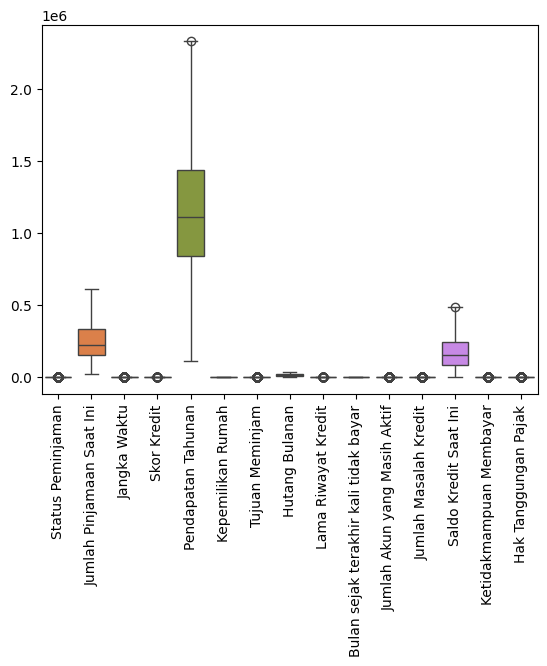

In [ ]:
sns.boxplot(data=data_model_rpinj)
plt.xticks(rotation=90,fontsize=10,horizontalalignment='center')
plt.show()


Proses Pre-Processing Data:
1. Mengatasi ketidakseimbangan data dengan SMOTE
2. Menstandarkan fitur
3. Membagi data menjadi set pelatihan dan pengujian dengan perbandingan 80:20

In [ ]:
x=data_model_rpinj.drop(['Status Peminjaman'],axis=1)
y=data_model_rpinj['Status Peminjaman']
x,y=SMOTE().fit_resample(x,y)
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0,stratify=y)

<Axes: xlabel='Status Peminjaman', ylabel='count'>

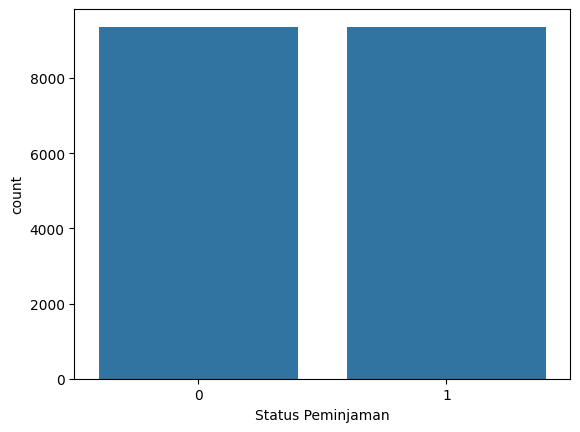

In [ ]:
sns.countplot(x=y_train,data=data_model_rpinj)

1. Proses melatih dan mengevaluasi model dengan cross-validation
2. Menghitung dan mengembalikan metrik kinerja model dalam bentuk DataFrame

Proses Menggabungkan Metrik Kinerja Pada Setiap Model

In [ ]:
models=[LogisticRegression(),XGBClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
result_models=pd.DataFrame(columns=['model','accuracy_train_cv','accuracy_test','precision_score','recall_score','f1_score','roc_auc_score'])
for model in models:
 results = fit_evaluate(model)
 result_models=pd.concat([result_models,results])
result_models.sort_values(by='recall_score',ascending=False)

model  accuracy_train_cv  accuracy_test  \
0               XGBClassifier          83.492539      83.108438   
0  GradientBoostingClassifier          80.610564      79.824419   
0      RandomForestClassifier          83.179519      83.498618   
0          AdaBoostClassifier          76.151424      76.003902   
0      DecisionTreeClassifier          74.232717      74.248090   
0        KNeighborsClassifier          72.745047      74.508210   
0          LogisticRegression          62.168266      62.103723   

   precision_score  recall_score   f1_score  roc_auc_score  
0        77.350887     93.626016  84.713844      83.110147  
0        73.695090     92.747967  82.131030      79.826520  
0        78.658876     91.934959  84.780327      83.499989  
0        72.338642     84.195122  77.817854      76.005233  
0        75.211363     72.325203  73.740053      74.247777  
0        75.831334     71.934959  73.831776      74.507792  
0        60.379464     70.373984  64.994744      62.105067

Visualisasi Data Hasil Akurasi Setiap Model

<Axes: xlabel='model', ylabel='accuracy_train_cv'>

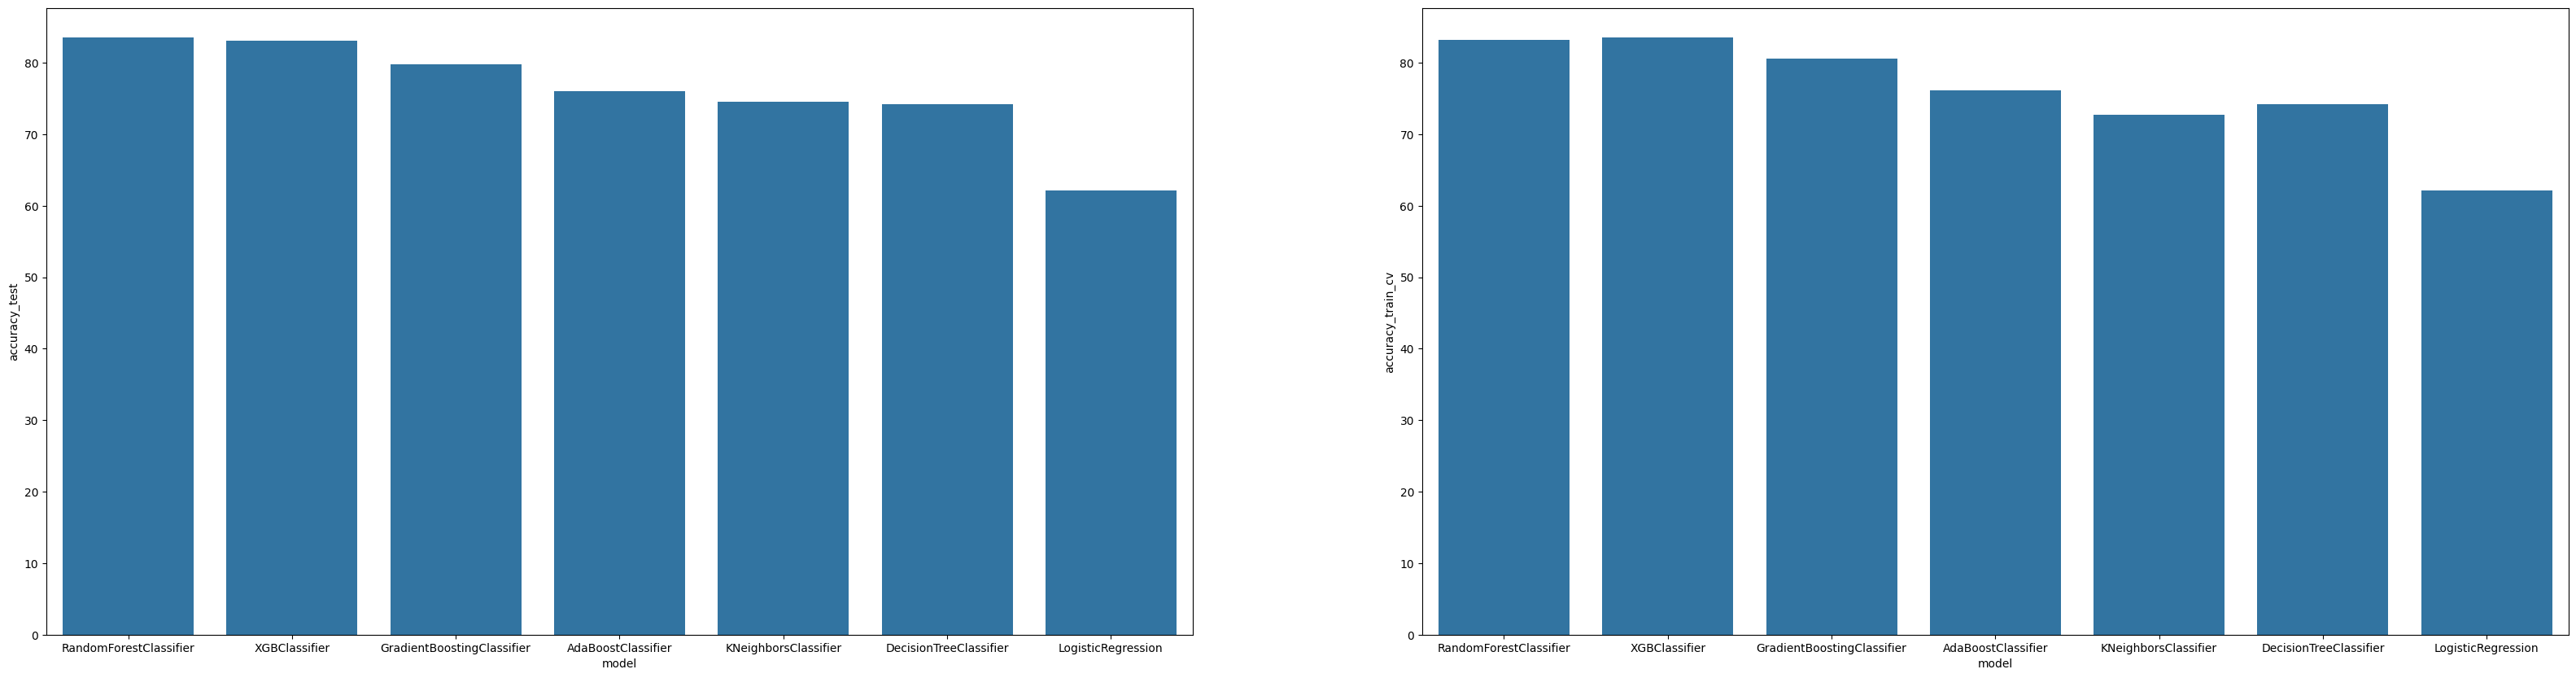

In [ ]:
plt.subplots(figsize=(40,10))
plt.subplot(1,2,1)
sns.barplot(y='accuracy_test',x='model',data=result_models.sort_values(by='accuracy_test',ascending=False))
plt.subplot(1,2,2)
sns.barplot(y='accuracy_train_cv',x='model',data=result_models.sort_values(by='accuracy_test',ascending=False))

Proses pelatihan dan evaluasi model Random Forest

In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
acc=accuracy_score(y_test,pred)*100
print(acc)

81.80783612420744


Proses Analisis Fitur dengan Pengaruh Tertinggi Terhadap Kelayakan Nasabah

In [ ]:
#feature importance
feature_df=pd.DataFrame({'feature':x.columns,'importance':model.feature_importances_})
feature_df.sort_values(by='importance',ascending=False)
feature_df.head(10)

feature  importance
0              Jumlah Pinjamaan Saat Ini    0.098045
1                           Jangka Waktu    0.043365
2                            Skor Kredit    0.116042
3                     Pendapatan Tahunan    0.110148
4                      Kepemilikan Rumah    0.032410
5                        Tujuan Meminjam    0.032533
6                         Hutang Bulanan    0.093770
7                    Lama Riwayat Kredit    0.090378
8  Bulan sejak terakhir kali tidak bayar    0.093547
9           Jumlah Akun yang Masih Aktif    0.105042

Visualisasi Hasil Analisis

<Axes: xlabel='importance', ylabel='feature'>

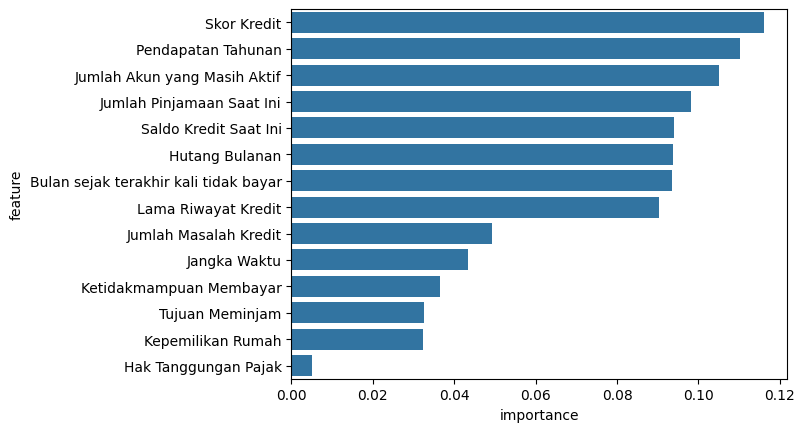

In [ ]:
sns.barplot(x='importance',y='feature',data=feature_df.sort_values(by='importance',ascending=False))

In [ ]:
# Mengurutkan DataFrame berdasarkan Skor Kredit, Pendapatan Tahunan, dan Jumlah Akun yang Masih Aktif secara bertingkat
sorted_data = data_cleaned_rpinj.sort_values(by=['Skor Kredit', 'Pendapatan Tahunan', 'Jumlah Akun yang Masih Aktif'], ascending=[False, False, False])

# Memilih top 10 ID Nasabah dari DataFrame yang telah diurutkan
top_10 = sorted_data.head(10)

# Menampilkan hasil dalam bentuk DataFrame
top_10[['ID Nasabah', 'Skor Kredit', 'Pendapatan Tahunan', 'Jumlah Akun yang Masih Aktif']]


ID Nasabah  Skor Kredit  Pendapatan Tahunan  \
83174  373e1884-c130-4d3c-a5f2-df4f2bd513de        751.0           2317297.0   
92094  2d798e2c-b399-49c0-94e2-b80aca7c58c2        751.0           2313972.0   
86468  04a6564f-6b4d-4e0e-bd4b-0b560d48db8d        751.0           2310096.0   
68064  1c3eca6e-4636-440e-a8b3-7a5534428bea        751.0           2297784.0   
79514  881aa31c-02a6-4571-983c-9b4b5b103433        751.0           2147152.0   
32450  02d75228-1bdd-49f8-bea1-36443951530d        751.0           2138906.0   
51302  7c9ae379-28e3-4231-9aa8-179ab20b5b46        751.0           2131591.0   
22276  9f0faa9a-0f91-4665-8cd7-edba0fed5f04        751.0           2017895.0   
81755  0c07efc7-06f2-4c65-8f09-18df603cc18b        751.0           1996919.0   
11870  2decbb4f-6e6d-48ec-81c5-889f4da05a56        751.0           1975050.0   

       Jumlah Akun yang Masih Aktif  
83174                          11.0  
92094                           9.0  
86468                          11.0  
68064                          30.0  
79514                          41.0  
32450                           9.0  
51302                          10.0  
22276                          10.0  
81755                          10.0  
11870                          18.0

Proses pelatihan dan evaluasi model XGBoost

In [ ]:
model=XGBClassifier()
model.fit(x_train,y_train)
predection=model.predict(x_test)
print(accuracy_score(y_test,predection)*100)
print(confusion_matrix(y_test,predection))


82.00292635343847
[[2242  834]
 [ 273 2802]]


Proses Analisis Fitur dengan Pengaruh Tertinggi Terhadap Kelayakan Nasabah

In [ ]:
#feature importance
feature_df=pd.DataFrame({'feature':x.columns,'importance':model.feature_importances_})
feature_df.sort_values(by='importance',ascending=False)
feature_df.head(10)

feature  importance
0              Jumlah Pinjamaan Saat Ini    0.016978
1                           Jangka Waktu    0.310901
2                            Skor Kredit    0.037680
3                     Pendapatan Tahunan    0.022209
4                      Kepemilikan Rumah    0.066473
5                        Tujuan Meminjam    0.055914
6                         Hutang Bulanan    0.017866
7                    Lama Riwayat Kredit    0.015793
8  Bulan sejak terakhir kali tidak bayar    0.021285
9           Jumlah Akun yang Masih Aktif    0.123759

Visualisasi Hasil Analisis

<Axes: xlabel='importance', ylabel='feature'>

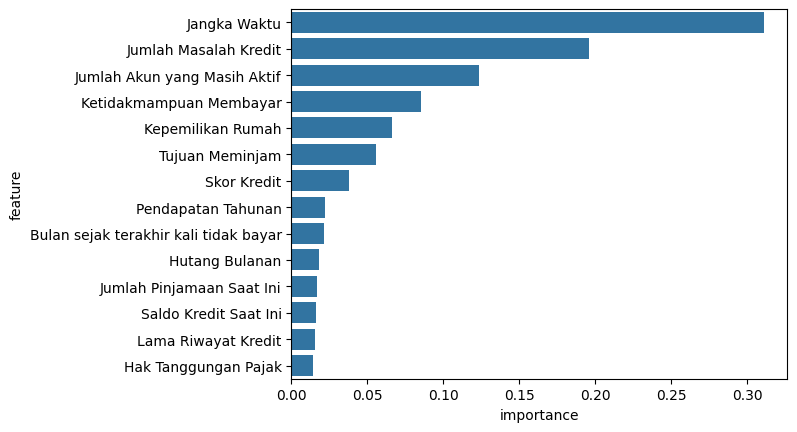

In [ ]:
sns.barplot(x='importance',y='feature',data=feature_df.sort_values(by='importance',ascending=False))

In [ ]:
# Mengurutkan DataFrame berdasarkan Skor Kredit, Pendapatan Tahunan, dan Jumlah Akun yang Masih Aktif secara bertingkat
sorted_data = data_cleaned_rpinj.sort_values(by=['Jangka Waktu', 'Jumlah Masalah Kredit', 'Jumlah Akun yang Masih Aktif'], ascending=[False, True, False])

# Memilih top 10 ID Nasabah dari DataFrame yang telah diurutkan
top_10 = sorted_data.head(10)

# Menampilkan hasil dalam bentuk DataFrame
top_10[['ID Nasabah', 'Jangka Waktu', 'Jumlah Masalah Kredit', 'Jumlah Akun yang Masih Aktif']]


ID Nasabah   Jangka Waktu  \
79514  881aa31c-02a6-4571-983c-9b4b5b103433  Jangka Pendek   
6039   20495f1b-ac09-4444-91a0-8487ea4fb67f  Jangka Pendek   
49261  de410970-bf09-4d30-a9c4-5cbe15182417  Jangka Pendek   
31817  28193bcc-e6fb-4b8d-8f7e-0d25f2029e48  Jangka Pendek   
85904  5608ccae-b824-4981-a167-2368ae55e049  Jangka Pendek   
57855  4cedae2e-7498-45f9-a1d0-d53f9f907e59  Jangka Pendek   
67808  371c5cd1-6ca2-4f91-84d0-cc735779d70d  Jangka Pendek   
71952  4af0c398-d9c2-45c4-bd72-47ad305d8e63  Jangka Pendek   
48043  2fd38862-598a-47bc-86c1-bcced499ef65  Jangka Pendek   
5795   c9bdea8f-44c3-4a03-96e2-b0422e072695  Jangka Pendek   

       Jumlah Masalah Kredit  Jumlah Akun yang Masih Aktif  
79514                    0.0                          41.0  
6039                     0.0                          40.0  
49261                    0.0                          39.0  
31817                    0.0                          37.0  
85904                    0.0                          37.0  
57855                    0.0                          36.0  
67808                    0.0                          36.0  
71952                    0.0                          35.0  
48043                    0.0                          34.0  
5795                     0.0                          33.0

#### Dengan One Hot Encoding

Proses mengonversi kolom kategori menjadi variabel dummy dan label encoding, kemudian menghapus kolom yang tidak diperlukan pada dataset

In [ ]:
label_encoder = LabelEncoder()


data_model_ohe_rpinj = data_cleaned_rpinj.copy()

data_model_ohe_rpinj = data_model_ohe_rpinj.join(pd.get_dummies(data_model_ohe_rpinj['Jangka Waktu']))
data_model_ohe_rpinj = data_model_ohe_rpinj.join(pd.get_dummies(data_model_ohe_rpinj['Kepemilikan Rumah']))
data_model_ohe_rpinj = data_model_ohe_rpinj.join(pd.get_dummies(data_model_ohe_rpinj['Nilai Skor']))
data_model_ohe_rpinj = data_model_ohe_rpinj.join(pd.get_dummies(data_model_ohe_rpinj['Tingkat Masalah']))
data_model_ohe_rpinj.drop(columns=["ID Peminjaman", "ID Nasabah", "Maximum Kredit Terbuka", "Lama bekerja", "Jangka Waktu", "Kepemilikan Rumah", "Nilai Skor", "Tingkat Masalah", "Skor Kredit"], inplace=True)
data_model_ohe_rpinj["Status Peminjaman"] = label_encoder.fit_transform(data_model_ohe_rpinj["Status Peminjaman"])
data_model_ohe_rpinj["Tujuan Meminjam"] = label_encoder.fit_transform(data_model_ohe_rpinj["Tujuan Meminjam"])

data_model_ohe_rpinj.head(5)

Status Peminjaman  Jumlah Pinjamaan Saat Ini  Pendapatan Tahunan  \
6                   1                   217646.0           1184194.0   
14                  1                   234124.0            693234.0   
20                  0                   317108.0           1133274.0   
25                  1                   465410.0           1722654.0   
39                  1                   449108.0           1454507.0   

    Tujuan Meminjam  Hutang Bulanan  Lama Riwayat Kredit  \
6                 2        10855.08                 19.6   
14                2        14211.24                 24.7   
20                2         9632.81                 17.4   
25                8        15647.45                 22.3   
39                2        13090.43                 28.8   

    Bulan sejak terakhir kali tidak bayar  Jumlah Akun yang Masih Aktif  \
6                                    10.0                          13.0   
14                                   46.0                          10.0   
20                                   53.0                           4.0   
25                                   30.0                           7.0   
39                                   21.0                          14.0   

    Jumlah Masalah Kredit  Saldo Kredit Saat Ini  ...  Rumah Sendiri  \
6                     1.0               122170.0  ...          False   
14                    1.0                28291.0  ...          False   
20                    0.0                60287.0  ...          False   
25                    0.0               107559.0  ...          False   
39                    0.0               193990.0  ...          False   

    Sewa Rumah   Baik  Buruk  Cukup  Minimal  Parah  Sedang  Signifikan  \
6        False  False  False   True    False  False   False       False   
14        True  False  False   True    False  False   False       False   
20        True  False  False   True    False  False   False       False   
25        True  False  False   True    False  False   False       False   
39       False  False  False   True    False  False   False       False   

    Tidak Bermasalah  
6               True  
14              True  
20              True  
25              True  
39              True  

[5 rows x 25 columns]

Proses Pre-Processing Data:
1. Mengatasi ketidakseimbangan data dengan SMOTE
2. Menstandarkan fitur
3. Membagi data menjadi set pelatihan dan pengujian dengan perbandingan 80:20

In [ ]:
x2=data_model_ohe_rpinj.drop(['Status Peminjaman'],axis=1)
y2=data_model_ohe_rpinj['Status Peminjaman']
x2,y2=SMOTE().fit_resample(x2,y2)
ss2=StandardScaler()
x_scaled2 =ss2.fit_transform(x2)
x_train2,x_test2 , y_train2, y_test2 =train_test_split(x_scaled2,y2,test_size=0.2,random_state=0,stratify=y2)

1. Proses melatih dan mengevaluasi model dengan cross-validation
2. Menghitung dan mengembalikan metrik kinerja model dalam bentuk DataFrame

In [ ]:
models=[LogisticRegression(),XGBClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
result_models=pd.DataFrame(columns=['model','accuracy_train_cv','accuracy_test','precision_score','recall_score','f1_score','roc_auc_score'])
for model in models:
 results = fit_evaluate(model, x_train2, y_train2, x_test2, y_test2)
 result_models=pd.concat([result_models,results])
result_models.sort_values(by='recall_score',ascending=False)

model  accuracy_train_cv  accuracy_test  \
0          LogisticRegression          77.615805      76.366354   
0  GradientBoostingClassifier          81.064427      79.440649   
0      RandomForestClassifier          83.418716      83.134073   
0          AdaBoostClassifier          79.163946      77.732707   
0               XGBClassifier          82.308392      82.023911   
0        KNeighborsClassifier          77.775976      76.921435   
0      DecisionTreeClassifier          75.053311      74.423570   

   precision_score  recall_score   f1_score  roc_auc_score  
0        68.843454     96.327925  80.298986      76.366354  
0        72.106444     96.029035  82.365867      79.440649  
0        77.228070     93.979505  84.784284      83.134073  
0        71.274157     92.912041  80.667285      77.732707  
0        76.614620     92.186166  83.682171      82.023911  
0        74.147836     82.664389  78.174844      76.921435  
0        75.512935     72.288642  73.865620      74.423570

Visualisasi Data Hasil Akurasi Setiap Model

<Axes: xlabel='model', ylabel='accuracy_train_cv'>

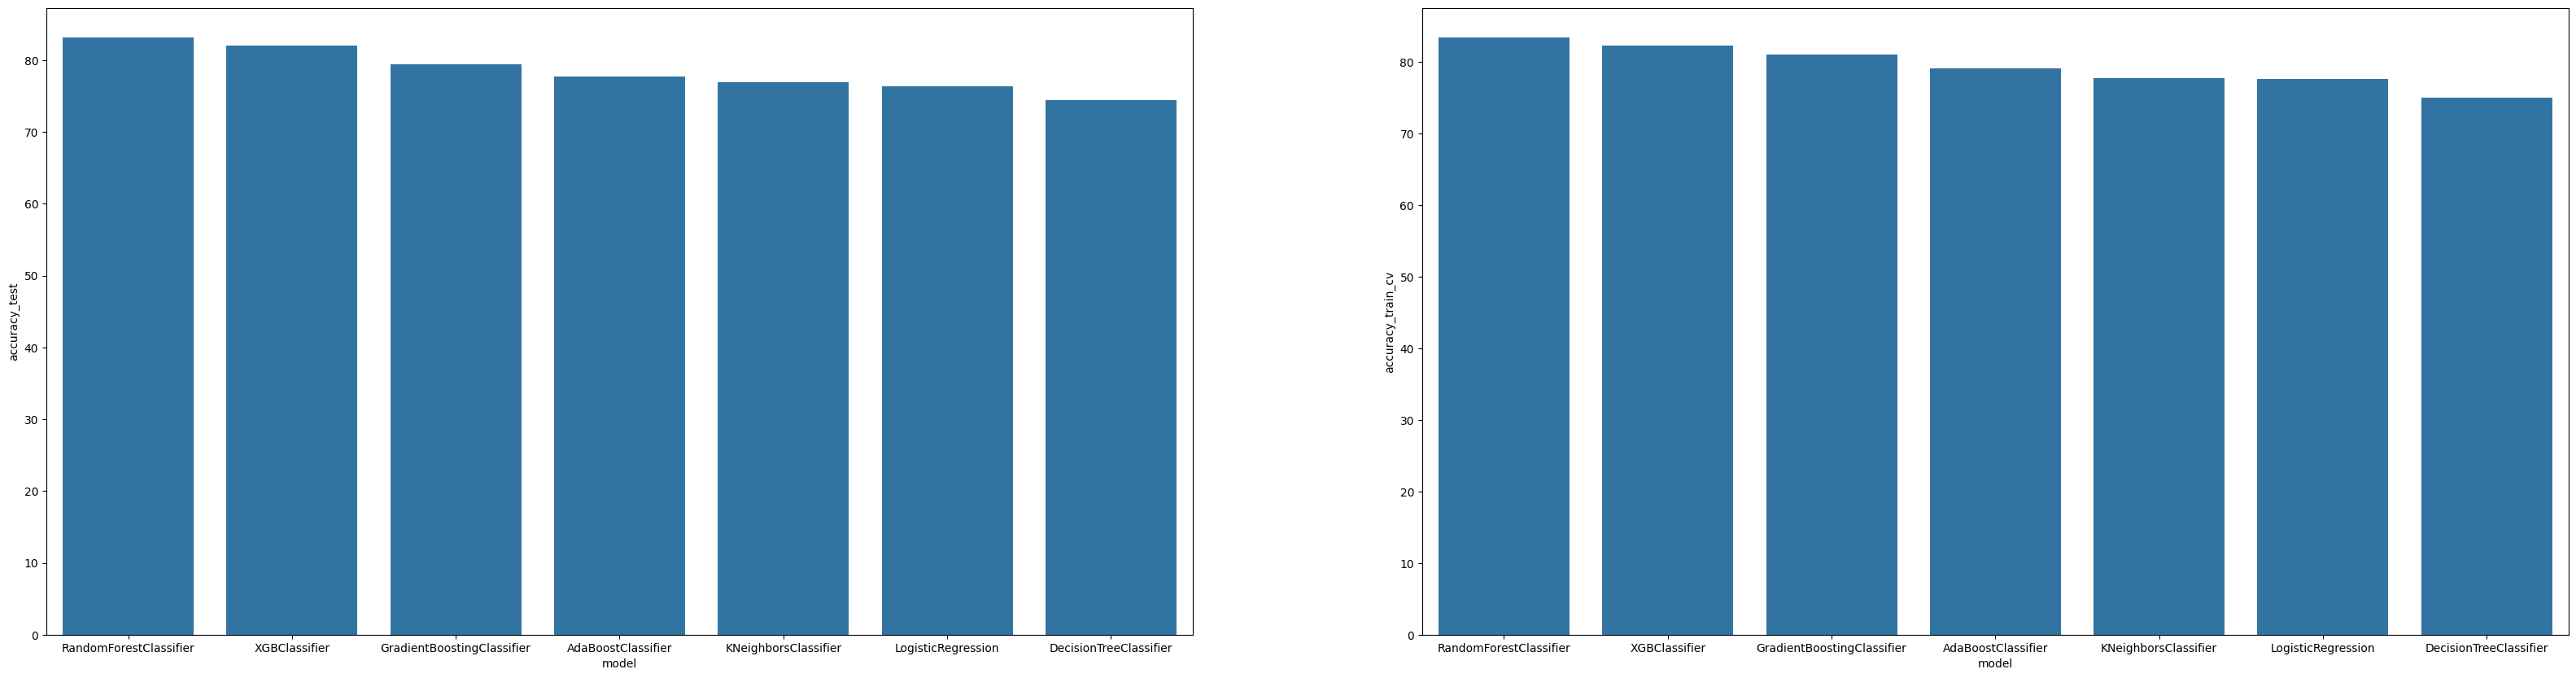

In [ ]:
plt.subplots(figsize=(40,10))
plt.subplot(1,2,1)
sns.barplot(y='accuracy_test',x='model',data=result_models.sort_values(by='accuracy_test',ascending=False))
plt.subplot(1,2,2)
sns.barplot(y='accuracy_train_cv',x='model',data=result_models.sort_values(by='accuracy_test',ascending=False))

Proses pelatihan dan evaluasi model Random Forest

In [ ]:
model2=RandomForestClassifier()
model2.fit(x_train2,y_train2)
pred=model.predict(x_test2)
acc=accuracy_score(y_test2,pred)*100
print(acc)

79.4406490179334


Proses Analisis Fitur dengan Pengaruh Tertinggi Terhadap Kelayakan Nasabah

In [ ]:
#feature importance
feature_df=pd.DataFrame({'feature':x2.columns,'importance':model2.feature_importances_})
feature_df.sort_values(by='importance',ascending=False)
feature_df.head(10)

feature  importance
0              Jumlah Pinjamaan Saat Ini    0.090691
1                     Pendapatan Tahunan    0.099200
2                        Tujuan Meminjam    0.023346
3                         Hutang Bulanan    0.085788
4                    Lama Riwayat Kredit    0.080152
5  Bulan sejak terakhir kali tidak bayar    0.079295
6           Jumlah Akun yang Masih Aktif    0.079600
7                  Jumlah Masalah Kredit    0.037091
8                  Saldo Kredit Saat Ini    0.085910
9                Ketidakmampuan Membayar    0.029171

Visualiasi Hasil Analisis

<Axes: xlabel='importance', ylabel='feature'>

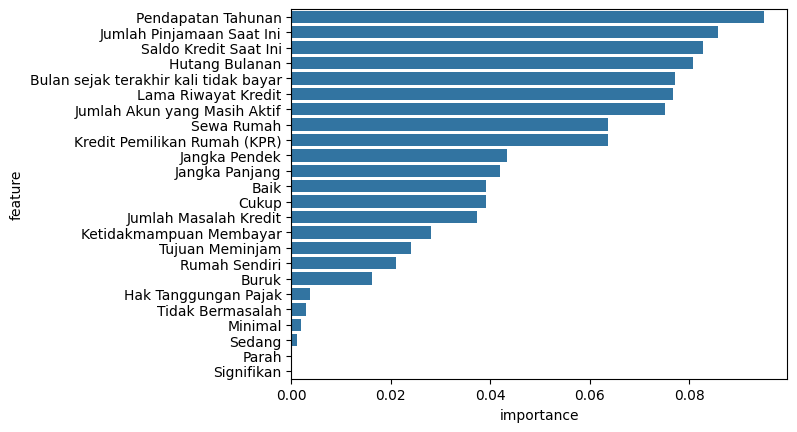

In [ ]:
sns.barplot(x='importance',y='feature',data=feature_df.sort_values(by='importance',ascending=False))

# Analisis Kelayakan Nasabah Berdasarkan Riwayat Penerimaan Pinjaman 📎

Pada bagian ini data yang diambil berdasarkan riwayat
penerimaan pinjaman nasabah atau customer bank. Hasil akhir yang diharapkan adalah dapat melakukan klasifikasi terhadap nasabah untuk pemilihan keputusan terhadap nasabah yang akan melakukan pinjaman yang di prediksi dapat membayar secara full

## Persiapan Data Kaggle

In [ ]:
!kaggle datasets download -d alieframdhanywijaya/datasetpinjamannasabahcsv

Dataset URL: https://www.kaggle.com/datasets/alieframdhanywijaya/datasetpinjamannasabahcsv
License(s): unknown
  0% 0.00/7.83k [00:00<?, ?B/s]
100% 7.83k/7.83k [00:00<00:00, 13.8MB/s]


In [ ]:
!unzip datasetpinjamannasabahcsv.zip

Archive:  datasetpinjamannasabahcsv.zip
  inflating: dataset-pinjaman-nasabah.csv  


In [ ]:
data_pnrmn = pd.read_csv("dataset-pinjaman-nasabah.csv")
data_pnrmn.head(10)

ID_Nasabah JenisKelamin StatusPernikahan  JumTanggungan    Pendidikan  \
0   LP001002         Male               No            0.0      Graduate   
1   LP001003         Male              Yes            1.0      Graduate   
2   LP001005         Male              Yes            0.0      Graduate   
3   LP001006         Male              Yes            0.0  Not Graduate   
4   LP001008         Male               No            0.0      Graduate   
5   LP001011         Male              Yes            2.0      Graduate   
6   LP001013         Male              Yes            0.0  Not Graduate   
7   LP001014         Male              Yes            3.0      Graduate   
8   LP001018         Male              Yes            2.0      Graduate   
9   LP001020         Male              Yes            1.0      Graduate   

  Wiraswasta  IncomeNasabah  IncomePasangan  JumlahPinjaman  \
0         No           5849               0             NaN   
1         No           4583            1508           128.0   
2        Yes           3000               0            66.0   
3         No           2583            2358           120.0   
4         No           6000               0           141.0   
5        Yes           5417            4196           267.0   
6         No           2333            1516            95.0   
7         No           3036            2504           158.0   
8         No           4006            1526           168.0   
9         No          12841           10968           349.0   

   JangkaWaktuPinjaman  Credit_History WilayahTempatTinggal StatusPinjaman  
0                360.0             1.0                Urban              Y  
1                360.0             1.0                Rural              N  
2                360.0             1.0                Urban              Y  
3                360.0             1.0                Urban              Y  
4                360.0             1.0                Urban              Y  
5                360.0             1.0                Urban              Y  
6                360.0             1.0                Urban              Y  
7                360.0             0.0            Semiurban              N  
8                360.0             1.0                Urban              Y  
9                360.0             1.0            Semiurban              N

In [ ]:
print("Jumlah baris dan kolom sebelum pembersihan: ", data.shape)
print(data_pnrmn.isnull().sum())

Jumlah baris dan kolom sebelum pembersihan:  (110867, 19)
ID_Nasabah               0
JenisKelamin            13
StatusPernikahan         3
JumTanggungan           15
Pendidikan               0
Wiraswasta              32
IncomeNasabah            0
IncomePasangan           0
JumlahPinjaman          22
JangkaWaktuPinjaman     14
Credit_History          50
WilayahTempatTinggal     0
StatusPinjaman           0
dtype: int64


## Data Cleaning

### Memperbaiki Penamaan Kolom

In [ ]:
readable_data_pnrmn = data_pnrmn.rename(columns={"ID_Nasabah" : "ID Nasabah",
                             "JenisKelamin" : "Jenis Kelamin",
                             "StatusPernikahan" : "Status Pernikahan",
                             "JumTanggungan" : "Jumlah Tanggungan",
                             "Pendidikan" : "Pendidikan",
                             "Wiraswasta" : "Wiraswasta",
                             "IncomeNasabah" : "Pendapatan Nasabah",
                             "IncomePasangan" : "Pendapatan Pasangan",
                             "JumlahPinjaman" : "Jumlah Pinjaman",
                             "JangkaWaktuPinjaman" : "Jangka Waktu Pinjaman",
                             "Credit_History": "Histori Kredit",
                             "WilayahTempatTinggal" : "Wilayah Tempat Tinggal",
                             "StatusPinjaman": "Status Pinjaman"
                             })

readable_data_pnrmn.head(5)

ID Nasabah Jenis Kelamin Status Pernikahan  Jumlah Tanggungan    Pendidikan  \
0   LP001002          Male                No                0.0      Graduate   
1   LP001003          Male               Yes                1.0      Graduate   
2   LP001005          Male               Yes                0.0      Graduate   
3   LP001006          Male               Yes                0.0  Not Graduate   
4   LP001008          Male                No                0.0      Graduate   

  Wiraswasta  Pendapatan Nasabah  Pendapatan Pasangan  Jumlah Pinjaman  \
0         No                5849                    0              NaN   
1         No                4583                 1508            128.0   
2        Yes                3000                    0             66.0   
3         No                2583                 2358            120.0   
4         No                6000                    0            141.0   

   Jangka Waktu Pinjaman  Histori Kredit Wilayah Tempat Tinggal  \
0                  360.0             1.0                  Urban   
1                  360.0             1.0                  Rural   
2                  360.0             1.0                  Urban   
3                  360.0             1.0                  Urban   
4                  360.0             1.0                  Urban   

  Status Pinjaman  
0               Y  
1               N  
2               Y  
3               Y  
4               Y

### Menghapus Data Duplikat

In [ ]:
print("Jumlah Peminjaman Duplikat Berdasarkan ID : ", readable_data_pnrmn["ID Nasabah"].duplicated().sum())

Jumlah Peminjaman Duplikat Berdasarkan ID :  0


### Mengapus Data Kosong atau N/A

In [ ]:
print(readable_data_pnrmn.isna().sum())

ID Nasabah                 0
Jenis Kelamin             13
Status Pernikahan          3
Jumlah Tanggungan         15
Pendidikan                 0
Wiraswasta                32
Pendapatan Nasabah         0
Pendapatan Pasangan        0
Jumlah Pinjaman           22
Jangka Waktu Pinjaman     14
Histori Kredit            50
Wilayah Tempat Tinggal     0
Status Pinjaman            0
dtype: int64


In [ ]:
readable_data_pnrmn["Jumlah Tanggungan"] = readable_data_pnrmn["Jumlah Tanggungan"].ffill()
readable_data_pnrmn["Histori Kredit"] = readable_data_pnrmn["Histori Kredit"].ffill()


In [ ]:
print(readable_data_pnrmn.isna().sum())

ID Nasabah                 0
Jenis Kelamin             13
Status Pernikahan          3
Jumlah Tanggungan          0
Pendidikan                 0
Wiraswasta                32
Pendapatan Nasabah         0
Pendapatan Pasangan        0
Jumlah Pinjaman           22
Jangka Waktu Pinjaman     14
Histori Kredit             0
Wilayah Tempat Tinggal     0
Status Pinjaman            0
dtype: int64


In [ ]:
 # Memeriksa nilai yang hilang

# Menghapus baris dengan nilai yang hilang
data_cleaned_pnrmn = readable_data_pnrmn.dropna()
# Menampilkan jumlah baris dan kolom setelah pembersihan

print("Jumlah baris dan kolom setelah pembersihan: ", data_cleaned.shape)
print(data_cleaned_pnrmn.isna().sum())


Jumlah baris dan kolom setelah pembersihan:  (15346, 19)
ID Nasabah                0
Jenis Kelamin             0
Status Pernikahan         0
Jumlah Tanggungan         0
Pendidikan                0
Wiraswasta                0
Pendapatan Nasabah        0
Pendapatan Pasangan       0
Jumlah Pinjaman           0
Jangka Waktu Pinjaman     0
Histori Kredit            0
Wilayah Tempat Tinggal    0
Status Pinjaman           0
dtype: int64


### Mengubah Data Menjadi lebih Mudah Dibaca

In [ ]:
# Jenis Kelamin
data_cleaned_pnrmn.loc[(data_cleaned_pnrmn["Jenis Kelamin"] == "Male"), "Jenis Kelamin"] = "Pria"
data_cleaned_pnrmn.loc[(data_cleaned_pnrmn["Jenis Kelamin"] == "Female"), "Jenis Kelamin"] = "Wanita"

# Status Pernikahan
data_cleaned_pnrmn.loc[(data_cleaned_pnrmn["Status Pernikahan"] == "Yes"), "Status Pernikahan"] = "Sudah Menikah"
data_cleaned_pnrmn.loc[(data_cleaned_pnrmn["Status Pernikahan"] == "No"), "Status Pernikahan"] = "Belum Menikah"

# Wiraswasta
data_cleaned_pnrmn.loc[(data_cleaned_pnrmn["Wiraswasta"] == "Yes"), "Wiraswasta"] = "Seorang Wiraswasta"
data_cleaned_pnrmn.loc[(data_cleaned_pnrmn["Wiraswasta"] == "No"), "Wiraswasta"] = "Bukan Wiraswasta"

# Pendidikan
data_cleaned_pnrmn.loc[(data_cleaned_pnrmn["Pendidikan"] == "Graduate"), "Pendidikan"] = "Sudah Lulus"
data_cleaned_pnrmn.loc[(data_cleaned_pnrmn["Pendidikan"] == "Not Graduate"), "Pendidikan"] = "Belum Lulus"


# Wilayah Tempat Tinggal
data_cleaned_pnrmn.loc[(data_cleaned_pnrmn["Wilayah Tempat Tinggal"] == "Urban"), "Wilayah Tempat Tinggal"] = "Kota Besar"
data_cleaned_pnrmn.loc[(data_cleaned_pnrmn["Wilayah Tempat Tinggal"] == "Semiurban"), "Wilayah Tempat Tinggal"] = "Kota Kecil"
data_cleaned_pnrmn.loc[(data_cleaned_pnrmn["Wilayah Tempat Tinggal"] == "Rural"), "Wilayah Tempat Tinggal"] = "Desa"


# Status Peminjaman
data_cleaned_pnrmn.loc[(data_cleaned_pnrmn["Status Pinjaman"] == "Y"), "Status Pinjaman"] = "Disetujui"
data_cleaned_pnrmn.loc[(data_cleaned_pnrmn["Status Pinjaman"] == "N"), "Status Pinjaman"] = "Tidak Disetujui"

data_cleaned_pnrmn.sample(5)

ID Nasabah Jenis Kelamin Status Pernikahan  Jumlah Tanggungan  \
43    LP001131          Pria     Sudah Menikah                0.0   
200   LP001674          Pria     Sudah Menikah                1.0   
33    LP001098          Pria     Sudah Menikah                0.0   
392   LP002263          Pria     Sudah Menikah                0.0   
582   LP002894        Wanita     Sudah Menikah                0.0   

      Pendidikan        Wiraswasta  Pendapatan Nasabah  Pendapatan Pasangan  \
43   Sudah Lulus  Bukan Wiraswasta                3941                 2336   
200  Belum Lulus  Bukan Wiraswasta                2600                 2500   
33   Sudah Lulus  Bukan Wiraswasta                3500                 1667   
392  Sudah Lulus  Bukan Wiraswasta                2583                 2115   
582  Sudah Lulus  Bukan Wiraswasta                3166                    0   

     Jumlah Pinjaman  Jangka Waktu Pinjaman  Histori Kredit  \
43             134.0                  360.0             1.0   
200             90.0                  360.0             1.0   
33             114.0                  360.0             1.0   
392            120.0                  360.0             1.0   
582             36.0                  360.0             1.0   

    Wilayah Tempat Tinggal Status Pinjaman  
43              Kota Kecil       Disetujui  
200             Kota Kecil       Disetujui  
33              Kota Kecil       Disetujui  
392             Kota Besar       Disetujui  
582             Kota Kecil       Disetujui

In [ ]:
print(data_cleaned_pnrmn.columns)

Index(['ID Nasabah', 'Jenis Kelamin', 'Status Pernikahan', 'Jumlah Tanggungan',
       'Pendidikan', 'Wiraswasta', 'Pendapatan Nasabah', 'Pendapatan Pasangan',
       'Jumlah Pinjaman', 'Jangka Waktu Pinjaman', 'Histori Kredit',
       'Wilayah Tempat Tinggal', 'Status Pinjaman'],
      dtype='object')


In [ ]:
data_cleaned_pnrmn['Pendapatan Nasabah'] = data_cleaned_pnrmn['Pendapatan Nasabah'].astype(float)
data_cleaned_pnrmn['Pendapatan Pasangan'] = data_cleaned_pnrmn['Pendapatan Pasangan'].astype(float)


### Menghapus Data Outliners

In [ ]:
num_cols = list(data_cleaned_pnrmn.select_dtypes("float").columns)
print(len(num_cols))
fig = make_subplots(rows= 2, cols=3, subplot_titles=num_cols)

idx=0
for row in range(2):
    for col in range(3):
        box_trace = go.Histogram(x=data_cleaned_pnrmn[num_cols[idx]], name="")
        fig.add_trace(box_trace, row=row+1, col=col+1)

        idx+=1
        if idx==len(num_cols):
            break

fig.update_layout(
    title_text='Distribution of numerical variables',
    titlefont=dict(size=22),
    showlegend=False
)

fig.show()

6


In [ ]:
cols = ["Pendapatan Nasabah",
        "Pendapatan Pasangan",
        "Jumlah Pinjaman"]

In [ ]:
for col in cols:
    data_cleaned_pnrmn = remove_outliers(data_cleaned_pnrmn, col)

print("Jumlah Peminjaman Setelah Menghapus Outliners : ", data_cleaned_pnrmn.shape)

Jumlah Peminjaman Setelah Menghapus Outliners :  (430, 13)


## Exploratory Data Analysis (EDA)

#### Analisis Univariat

##### Data Kategori

In [ ]:
analysis_status_pembayaran = data_cleaned_pnrmn["Status Pinjaman"].value_counts().reset_index(name="Total")
print(analysis_status_pembayaran)

fig = px.bar(analysis_status_pembayaran,
       x="Status Pinjaman",
       y="Total")

fig.show()


   Status Pinjaman  Total
0        Disetujui    302
1  Tidak Disetujui    128


In [ ]:
analysis_status_pembayaran = data_cleaned_pnrmn["Status Pernikahan"].value_counts().reset_index(name="Total")
print(analysis_status_pembayaran)

fig = px.bar(analysis_status_pembayaran,
       x="Status Pernikahan",
       y="Total")

fig.show()


  Status Pernikahan  Total
0     Sudah Menikah    278
1     Belum Menikah    152


In [ ]:
analysis_status_pembayaran = data_cleaned_pnrmn["Pendidikan"].value_counts().reset_index(name="Total")
print(analysis_status_pembayaran)

fig = px.bar(analysis_status_pembayaran,
       x="Pendidikan",
       y="Total")

fig.show()


    Pendidikan  Total
0  Sudah Lulus    319
1  Belum Lulus    111


In [ ]:
analysis_wilayah_tempat = data_cleaned_pnrmn["Wilayah Tempat Tinggal"].value_counts().reset_index(name="Total")
print(analysis_wilayah_tempat)

fig = px.pie(analysis_wilayah_tempat,
             values="Total",
             names="Wilayah Tempat Tinggal",
             title="Distribusi Tujuan Meminjam")

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


  Wilayah Tempat Tinggal  Total
0             Kota Kecil    170
1             Kota Besar    131
2                   Desa    129


In [ ]:
# "dropna" as False to count NaN values
analysis_wiraswasta = data_cleaned_pnrmn["Wiraswasta"].value_counts(dropna=False).reset_index(name="Total")
print(analysis_wiraswasta)


fig = px.bar(analysis_wiraswasta,
             x="Total",
             y="Wiraswasta",
             orientation='h')
fig.show()


           Wiraswasta  Total
0    Bukan Wiraswasta    383
1  Seorang Wiraswasta     47


##### Data Numerik

In [ ]:
num_cols = list(data_cleaned_pnrmn.select_dtypes("float").columns)
fig = make_subplots(rows= 2, cols=3, subplot_titles=num_cols)

idx=0
for row in range(2):
    for col in range(3):
        box_trace = go.Histogram(x=data_cleaned_pnrmn[num_cols[idx]], name="")
        fig.add_trace(box_trace, row=row+1, col=col+1)

        idx+=1
        if idx==len(num_cols):
            break

fig.update_layout(
    title_text='Distribution of numerical variables',
    titlefont=dict(size=22),
    showlegend=False
)

fig.show()

### Analisis Bivariat

In [ ]:
analysis_wiraswasta = data_cleaned_pnrmn[["Wilayah Tempat Tinggal", "Status Pinjaman"]].value_counts(dropna=False).reset_index(name="Total")

fig = px.histogram(analysis_wiraswasta, x="Wilayah Tempat Tinggal", y="Total",
             color='Status Pinjaman', barmode='group',
             height=400)
fig.show()

In [ ]:
analysis_wiraswasta = data_cleaned_pnrmn[["Pendidikan", "Status Pinjaman"]].value_counts(dropna=False).reset_index(name="Total")

fig = px.histogram(analysis_wiraswasta, x="Pendidikan", y="Total",
             color='Status Pinjaman', barmode='group',
             height=400)
fig.show()

## Analisa Keputusan Dengan Model Machine Learning

#### Dengan Label Encoding

In [ ]:
import re

label_encoder = LabelEncoder()


data_model_pnrm = data_cleaned_pnrmn.copy()

data_model_pnrm.drop(columns=["ID Nasabah"], inplace=True)
data_model_pnrm["Status Pernikahan"] = label_encoder.fit_transform(data_model_pnrm["Status Pernikahan"])
data_model_pnrm["Jenis Kelamin"] = label_encoder.fit_transform(data_model_pnrm["Jenis Kelamin"])
data_model_pnrm["Wiraswasta"] = label_encoder.fit_transform(data_model_pnrm["Wiraswasta"])
data_model_pnrm["Pendidikan"] = label_encoder.fit_transform(data_model_pnrm["Pendidikan"])
data_model_pnrm["Wilayah Tempat Tinggal"] = label_encoder.fit_transform(data_model_pnrm["Wilayah Tempat Tinggal"])
data_model_pnrm["Status Pinjaman"] = label_encoder.fit_transform(data_model_pnrm["Status Pinjaman"])

data_model_pnrm.head(5)

Jenis Kelamin  Status Pernikahan  Jumlah Tanggungan  Pendidikan  \
1              0                  1                1.0           1   
2              0                  1                0.0           1   
3              0                  1                0.0           0   
4              0                  0                0.0           1   
6              0                  1                0.0           0   

   Wiraswasta  Pendapatan Nasabah  Pendapatan Pasangan  Jumlah Pinjaman  \
1           0              4583.0               1508.0            128.0   
2           1              3000.0                  0.0             66.0   
3           0              2583.0               2358.0            120.0   
4           0              6000.0                  0.0            141.0   
6           0              2333.0               1516.0             95.0   

   Jangka Waktu Pinjaman  Histori Kredit  Wilayah Tempat Tinggal  \
1                  360.0             1.0                       0   
2                  360.0             1.0                       1   
3                  360.0             1.0                       1   
4                  360.0             1.0                       1   
6                  360.0             1.0                       1   

   Status Pinjaman  
1                1  
2                0  
3                0  
4                0  
6                0

In [ ]:
fig = px.imshow(data_model_pnrm.corr(), text_auto=True)
fig.show()

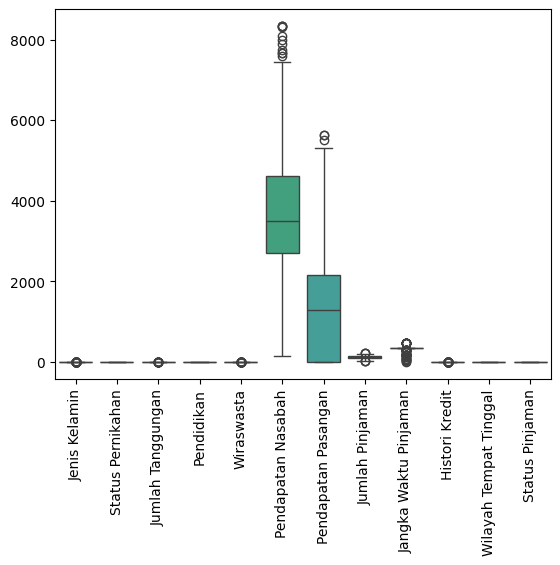

In [ ]:
sns.boxplot(data=data_model_pnrm)
plt.xticks(rotation=90,fontsize=10,horizontalalignment='center')
plt.show()

In [ ]:
x=data_model_pnrm.drop(['Status Pinjaman'],axis=1)
y=data_model_pnrm['Status Pinjaman']
x,y=SMOTE().fit_resample(x,y)
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0,stratify=y)

In [ ]:
models=[LogisticRegression(),XGBClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
result_models=pd.DataFrame(columns=['model','accuracy_train_cv','accuracy_test','precision_score','recall_score','f1_score','roc_auc_score'])
for model in models:
 results = fit_evaluate(model, x_train, y_train, x_test, y_test)
 result_models=pd.concat([result_models,results])
result_models.sort_values(by='recall_score',ascending=False)

model  accuracy_train_cv  accuracy_test  \
0               XGBClassifier          82.785311      82.550336   
0      DecisionTreeClassifier          80.098870      77.181208   
0      RandomForestClassifier          83.960452      77.852349   
0          LogisticRegression          79.751412      76.510067   
0        KNeighborsClassifier          77.048023      75.838926   
0  GradientBoostingClassifier          82.615819      79.194631   
0          AdaBoostClassifier          81.437853      77.181208   

   precision_score  recall_score   f1_score  roc_auc_score  
0        84.285714     79.729730  81.944444      82.531532  
0        77.027027     77.027027  77.027027      77.180180  
0        79.710145     74.324324  76.923077      77.828829  
0        78.260870     72.972973  75.524476      76.486486  
0        77.142857     72.972973  75.000000      75.819820  
0        85.245902     70.270270  77.037037      79.135135  
0        83.333333     67.567568  74.626866      77.117117

<Axes: xlabel='model', ylabel='accuracy_train_cv'>

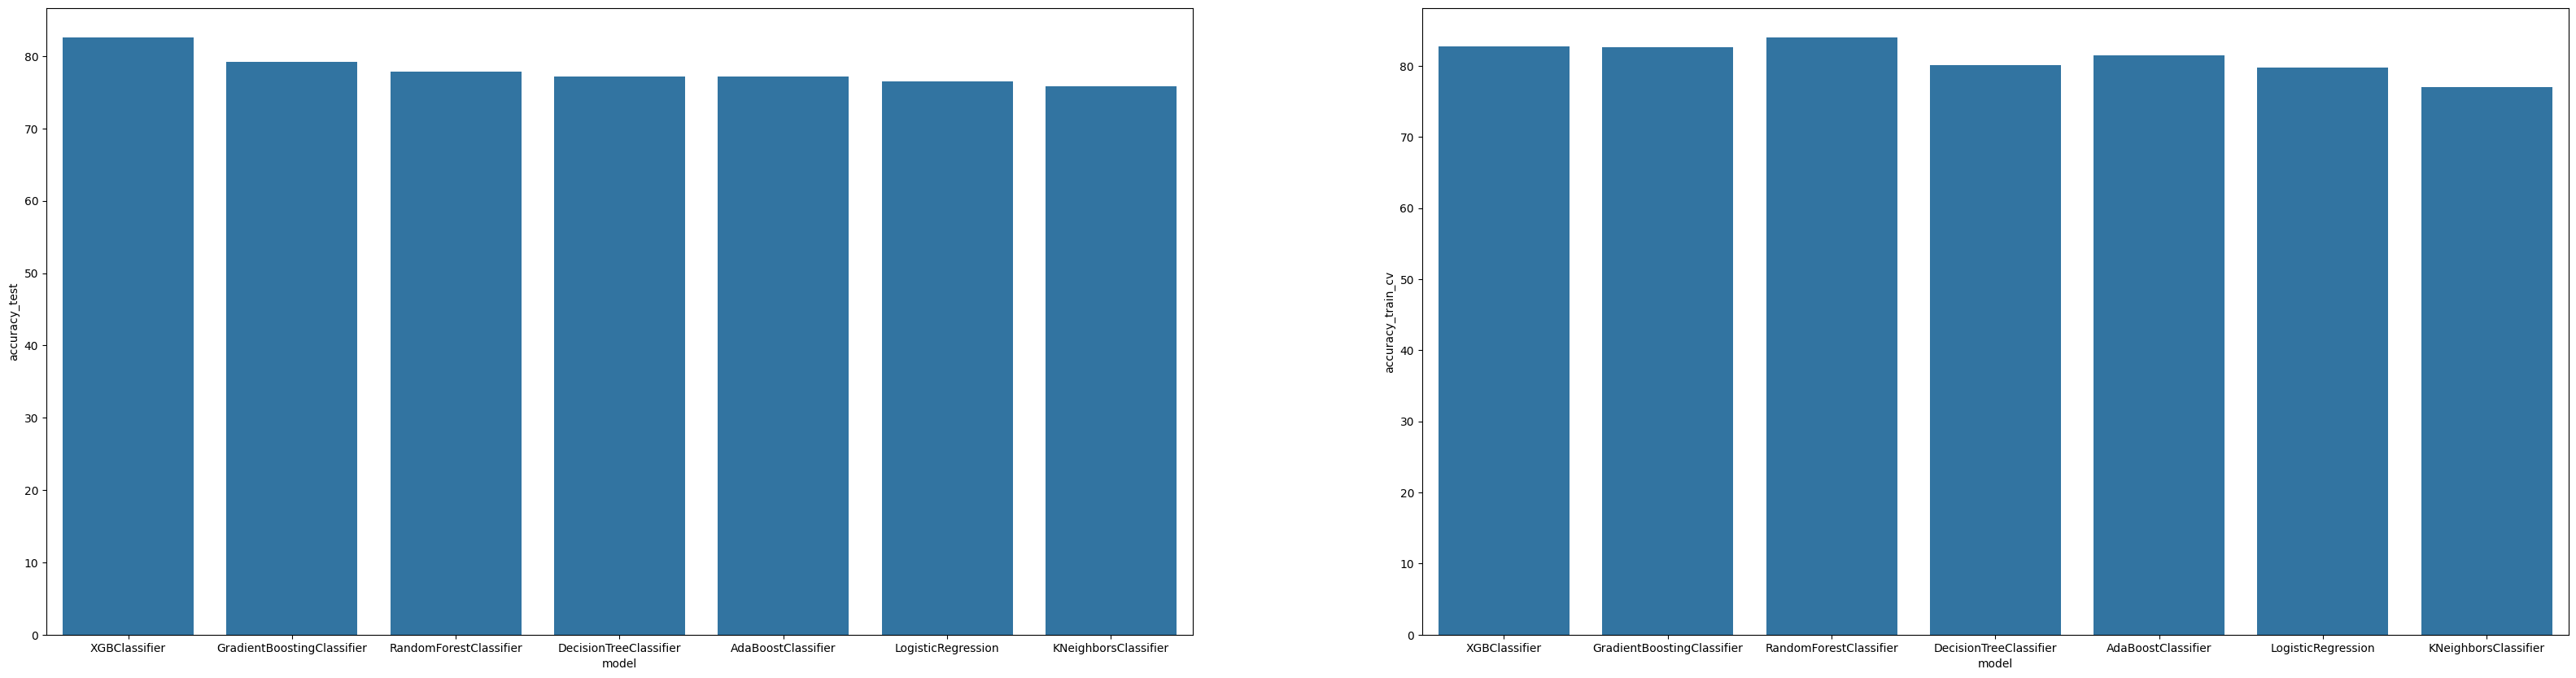

In [ ]:
plt.subplots(figsize=(40,10))
plt.subplot(1,2,1)
sns.barplot(y='accuracy_test',x='model',data=result_models.sort_values(by='accuracy_test',ascending=False))
plt.subplot(1,2,2)
sns.barplot(y='accuracy_train_cv',x='model',data=result_models.sort_values(by='accuracy_test',ascending=False))

In [ ]:
model=GradientBoostingClassifier()
model.fit(x_train,y_train)
predection=model.predict(x_test)
print(accuracy_score(y_test,predection)*100)
print(confusion_matrix(y_test,predection))


84.29752066115702
[[54  7]
 [12 48]]


In [ ]:
#feature importance
feature_df=pd.DataFrame({'feature':x.columns,'importance':model.feature_importances_})
feature_df.sort_values(by='importance',ascending=False)
feature_df.head(10)

feature  importance
0          Jenis Kelamin    0.002104
1      Status Pernikahan    0.015923
2      Jumlah Tanggungan    0.042324
3             Pendidikan    0.020170
4             Wiraswasta    0.003426
5     Pendapatan Nasabah    0.166514
6    Pendapatan Pasangan    0.049145
7        Jumlah Pinjaman    0.064226
8  Jangka Waktu Pinjaman    0.061790
9         Histori Kredit    0.510718

<Axes: xlabel='importance', ylabel='feature'>

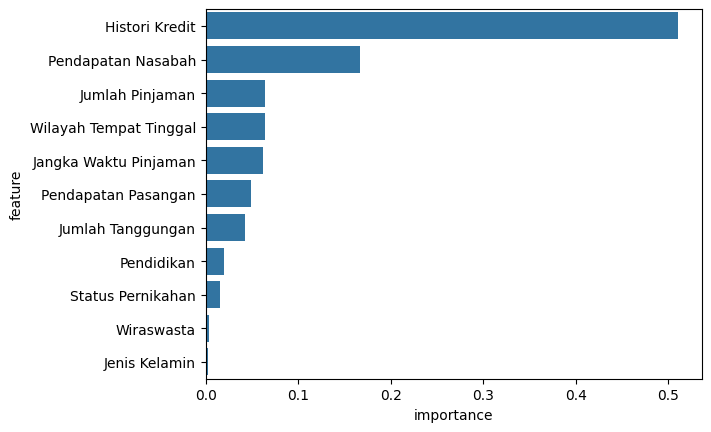

In [ ]:
sns.barplot(x='importance',y='feature',data=feature_df.sort_values(by='importance',ascending=False))

In [ ]:
model=XGBClassifier()
model.fit(x_train,y_train)
predection=model.predict(x_test)
print(accuracy_score(y_test,predection)*100)
print(confusion_matrix(y_test,predection))


82.64462809917356
[[54  7]
 [14 46]]


In [ ]:
#feature importance
feature_df=pd.DataFrame({'feature':x.columns,'importance':model.feature_importances_})
feature_df.sort_values(by='importance',ascending=False)
feature_df.head(10)

feature  importance
0          Jenis Kelamin    0.023912
1      Status Pernikahan    0.037060
2      Jumlah Tanggungan    0.037717
3             Pendidikan    0.051322
4             Wiraswasta    0.030895
5     Pendapatan Nasabah    0.040198
6    Pendapatan Pasangan    0.032336
7        Jumlah Pinjaman    0.026514
8  Jangka Waktu Pinjaman    0.091610
9         Histori Kredit    0.558149

<Axes: xlabel='importance', ylabel='feature'>

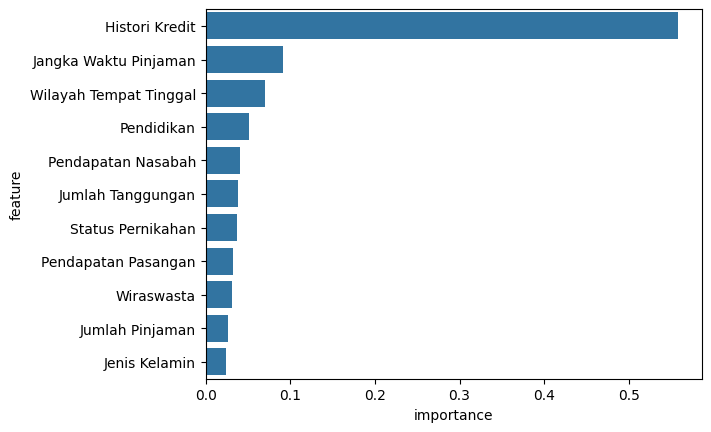

In [ ]:
sns.barplot(x='importance',y='feature',data=feature_df.sort_values(by='importance',ascending=False))

#### Dengan Metode One Hot Encoding

In [ ]:
label_encoder = LabelEncoder()


data_model_ohe_pnrm = data_cleaned_pnrmn.copy()

data_model_ohe_pnrm = data_model_ohe_pnrm.join(pd.get_dummies(data_model_ohe_pnrm['Status Pernikahan']))
data_model_ohe_pnrm = data_model_ohe_pnrm.join(pd.get_dummies(data_model_ohe_pnrm['Jenis Kelamin']))
data_model_ohe_pnrm = data_model_ohe_pnrm.join(pd.get_dummies(data_model_ohe_pnrm['Wiraswasta']))
data_model_ohe_pnrm = data_model_ohe_pnrm.join(pd.get_dummies(data_model_ohe_pnrm['Pendidikan']))
data_model_ohe_pnrm = data_model_ohe_pnrm.join(pd.get_dummies(data_model_ohe_pnrm['Wilayah Tempat Tinggal']))

data_model_ohe_pnrm["Status Pinjaman"] = label_encoder.fit_transform(data_model_ohe_pnrm["Status Pinjaman"])


data_model_ohe_pnrm.drop(columns=["ID Nasabah", "Status Pernikahan", "Jenis Kelamin", "Wiraswasta", "Pendidikan", "Wilayah Tempat Tinggal"], inplace=True)

data_model_ohe_pnrm.head(5)

Jumlah Tanggungan  Pendapatan Nasabah  Pendapatan Pasangan  \
1                1.0              4583.0               1508.0   
2                0.0              3000.0                  0.0   
3                0.0              2583.0               2358.0   
4                0.0              6000.0                  0.0   
6                0.0              2333.0               1516.0   

   Jumlah Pinjaman  Jangka Waktu Pinjaman  Histori Kredit  Status Pinjaman  \
1            128.0                  360.0             1.0                1   
2             66.0                  360.0             1.0                0   
3            120.0                  360.0             1.0                0   
4            141.0                  360.0             1.0                0   
6             95.0                  360.0             1.0                0   

   Belum Menikah  Sudah Menikah  Pria  Wanita  Bukan Wiraswasta  \
1          False           True  True   False              True   
2          False           True  True   False             False   
3          False           True  True   False              True   
4           True          False  True   False              True   
6          False           True  True   False              True   

   Seorang Wiraswasta  Belum Lulus  Sudah Lulus   Desa  Kota Besar  Kota Kecil  
1               False        False         True   True       False       False  
2                True        False         True  False        True       False  
3               False         True        False  False        True       False  
4               False        False         True  False        True       False  
6               False         True        False  False        True       False

In [ ]:
x2=data_model_ohe_pnrm.drop(['Status Pinjaman'],axis=1)
y2=data_model_ohe_pnrm['Status Pinjaman']
x2,y2=SMOTE().fit_resample(x2,y2)
ss2=StandardScaler()
x_scaled2 =ss2.fit_transform(x2)
x_train2,x_test2 , y_train2, y_test2 =train_test_split(x_scaled2,y2,test_size=0.2,random_state=0,stratify=y2)

In [ ]:
models=[LogisticRegression(),XGBClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
result_models=pd.DataFrame(columns=['model','accuracy_train_cv','accuracy_test','precision_score','recall_score','f1_score','roc_auc_score'])
for model in models:
 results = fit_evaluate(model, x_train2, y_train2, x_test2, y_test2)
 result_models=pd.concat([result_models,results])
result_models.sort_values(by='recall_score',ascending=False)

model  accuracy_train_cv  accuracy_test  \
0               XGBClassifier          84.127119      81.879195   
0          AdaBoostClassifier          83.641243      80.536913   
0  GradientBoostingClassifier          84.977401      79.865772   
0      RandomForestClassifier          84.638418      81.879195   
0      DecisionTreeClassifier          76.059322      73.154362   
0          LogisticRegression          85.483051      79.865772   
0        KNeighborsClassifier          78.570621      73.825503   

   precision_score  recall_score   f1_score  roc_auc_score  
0        83.098592     79.729730  81.379310      81.864865  
0        83.582090     75.675676  79.432624      80.504505  
0        82.352941     75.675676  78.873239      79.837838  
0        88.524590     72.972973  80.000000      81.819820  
0        75.000000     68.918919  71.830986      73.126126  
0        89.285714     67.567568  76.923077      79.783784  
0        81.818182     60.810811  69.767442      73.738739

In [ ]:
model=AdaBoostClassifier	()
model.fit(x_train2,y_train2)
predection=model.predict(x_test2)
print(accuracy_score(y_test2,predection)*100)
print(confusion_matrix(y_test2,predection))

78.51239669421489
[[51 10]
 [16 44]]


In [ ]:
#feature importance
feature_df=pd.DataFrame({'feature':x2.columns,'importance':model.feature_importances_})
feature_df.sort_values(by='importance',ascending=False)
feature_df.head(10)

feature  importance
0      Jumlah Tanggungan        0.04
1     Pendapatan Nasabah        0.24
2    Pendapatan Pasangan        0.10
3        Jumlah Pinjaman        0.24
4  Jangka Waktu Pinjaman        0.10
5         Histori Kredit        0.06
6          Belum Menikah        0.02
7          Sudah Menikah        0.00
8                   Pria        0.00
9                 Wanita        0.02

<Axes: xlabel='importance', ylabel='feature'>

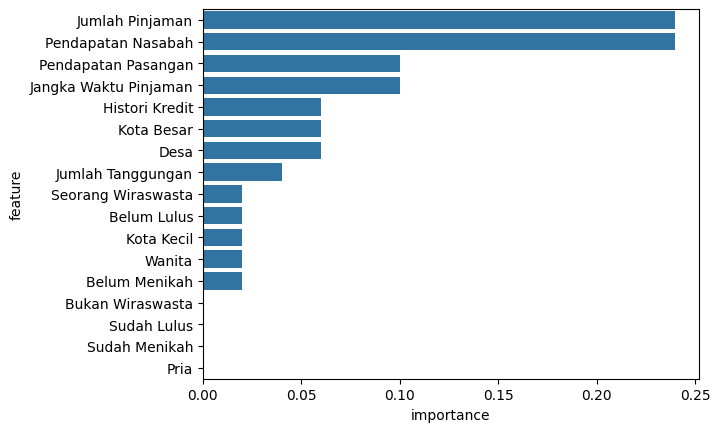

In [ ]:
sns.barplot(x='importance',y='feature',data=feature_df.sort_values(by='importance',ascending=False))

In [ ]:
model=XGBClassifier()
model.fit(x_train2,y_train2)
predection=model.predict(x_test2)
print(accuracy_score(y_test2,predection)*100)
print(confusion_matrix(y_test2,predection))


83.47107438016529
[[53  8]
 [12 48]]


In [ ]:
#feature importance
feature_df=pd.DataFrame({'feature':x2.columns,'importance':model.feature_importances_})
feature_df.sort_values(by='importance',ascending=False)
feature_df.head(10)

feature  importance
0      Jumlah Tanggungan    0.014252
1     Pendapatan Nasabah    0.021700
2    Pendapatan Pasangan    0.020265
3        Jumlah Pinjaman    0.016749
4  Jangka Waktu Pinjaman    0.070007
5         Histori Kredit    0.384274
6          Belum Menikah    0.020641
7          Sudah Menikah    0.024033
8                   Pria    0.017406
9                 Wanita    0.012757

<Axes: xlabel='importance', ylabel='feature'>

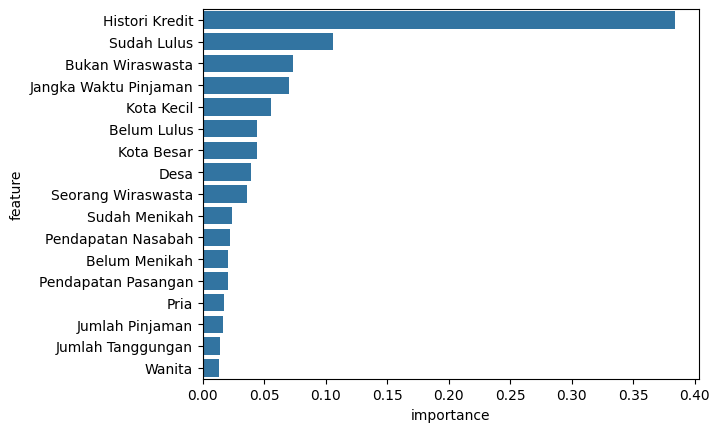

In [ ]:
sns.barplot(x='importance',y='feature',data=feature_df.sort_values(by='importance',ascending=False))

# Kesimpulan

Berdasarkan Visualisasi dan Metode yang digunakan, `XGBClassifier ` memiliki skor paling tinggi dibanding yang lain dengan skor rata-rata 82.5% dari dua dataset yang dipakai.

Dari

* Pada Dataset Pertama yang bedasarkan Riwayat Pembayaran Pinjaman Kredit, Nasabah yang layak menerima pinjaman dapat dilihat dari `Skor Kredit`, `Pendapatan Tahunan` dan `Jangka Waktu` yang akan dilakukan untuk melakukan pinjaman.

* Pada Dataset Kedua, keputusan yang diambil berdasarkan Riwayat Penerimaan Pinjaman. Nasabah yang layak menerima pinjaman dapat dilihat dari `Histori Kredit`, `Jumlah Pinjaman` dan `Pendapatan Nasabah`


